# Analyse exploratoire des données (EDA)

In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px


In [240]:
df = pd.read_csv("Base_Etudiant.csv")

In [241]:
df.head()

,id_et,date_nais_et,lieu_nais_et,date_bac,etab_bac,niveau_diplome_sup_et,lib_specialite_esp_et,date_entree_esp_et,lib_nature_bac,classe_courante_et,classe_sem1,niveau_courant_et,sexe,nationalite,niveau_acces,classe_prec_et,resultat_annee_prec,moy_bac,score_final,gouvernorat
0,ID1,10/07/1996 00:00,Tunis,NaN,NaN,NaN,Master Professionnel en Business Analytics,NaN,NaN,2-BA-2,2-BA-2,2,M,TUNISIENNE,5,1-BA-2,Admis,NaN,-1.0,NaN
1,ID2,19/12/2002 00:00,TUNIS,01/06/2021 00:00,Lycée Secondaire Ezzahra,3.0,Master Professionnel en Marketing Digital,16/09/2024 00:00,Bac Informatique,1-MKD-1,---,1,M,TUNISIENNE,4,NaN,NaN,12.91,-1.0,Ben Arous
2,ID3,09/08/2003 00:00,TUNIS,01/06/2024 00:00,Lycee Secondaire ASDRUBAL BARDO,0.0,Licence en Sciences de Gestion,30/08/2024 00:00,Bac Economie,1-LSG-1,1-LSG-1,1,M,TUNISIENNE,1,NaN,NaN,9.81,-1.0,Ariana
3,ID4,15/09/1999 00:00,TUNIS,NaN,Lycée les pères blancs,NaN,Master Professionnel en Management Digital et ...,NaN,Bac Economie-gestion,1-MDSI-1,1-MDSI-1,1,F,TUNISIENNE,4,3-LSG-4,ADMISE Mention Assez Bien,12.00,-1.0,NaN
4,ID5,17/10/1999 00:00,Bizerte,01/06/2020 00:00,Lycée Bhira Bizerte,0.0,Licence en Sciences de Gestion,18/09/2023 00:00,Bac Economie,2-LSG-3,2-LSG-3,2,M,TUNISIENNE,2,1-LSG-8,ADMIS Mention Passable,10.48,-1.0,Bizerte


In [242]:
df.shape

(2621, 20)

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2621 entries, 0 to 2620
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_et                  2621 non-null   object 
 1   date_nais_et           2621 non-null   object 
 2   lieu_nais_et           2619 non-null   object 
 3   date_bac               2259 non-null   object 
 4   etab_bac               2457 non-null   object 
 5   niveau_diplome_sup_et  2259 non-null   float64
 6   lib_specialite_esp_et  2621 non-null   object 
 7   date_entree_esp_et     1388 non-null   object 
 8   lib_nature_bac         2563 non-null   object 
 9   classe_courante_et     2621 non-null   object 
 10  classe_sem1            2369 non-null   object 
 11  niveau_courant_et      2621 non-null   int64  
 12  sexe                   2621 non-null   object 
 13  nationalite            2619 non-null   object 
 14  niveau_acces           2621 non-null   int64  
 15  clas

In [244]:
df.isnull().sum()

id_et                       0
date_nais_et                0
lieu_nais_et                2
date_bac                  362
etab_bac                  164
niveau_diplome_sup_et     362
lib_specialite_esp_et       0
date_entree_esp_et       1233
lib_nature_bac             58
classe_courante_et          0
classe_sem1               252
niveau_courant_et           0
sexe                        0
nationalite                 2
niveau_acces                0
classe_prec_et            905
resultat_annee_prec       936
moy_bac                    99
score_final                 0
gouvernorat               446
dtype: int64

In [245]:
features_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes=='O']
print("Missing values: ")
for feature in features_nan:
    print("{}:{}%".format(feature,np.round(df[feature].isnull().mean(),2)))

Missing values: 
lieu_nais_et:0.0%
date_bac:0.14%
etab_bac:0.06%
date_entree_esp_et:0.47%
lib_nature_bac:0.02%
classe_sem1:0.1%
nationalite:0.0%
classe_prec_et:0.35%
resultat_annee_prec:0.36%
gouvernorat:0.17%


In [246]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
niveau_diplome_sup_et,2259.0,0.691014,1.233990,0.0,0.0000,0.00,1.0000,3.00
niveau_courant_et,2621.0,1.839756,0.839551,1.0,1.0000,2.00,2.0000,4.00
niveau_acces,2621.0,2.688668,1.378122,1.0,1.0000,3.00,4.0000,5.00
moy_bac,2522.0,11.096622,1.884248,9.0,10.0825,10.77,11.7875,76.35
score_final,2621.0,-0.542774,5.143817,-1.0,-1.0000,-1.00,-1.0000,75.08


In [247]:
df.describe(include=['object']).T

,count,unique,top,freq
id_et,2621,2621,ID2621,1
date_nais_et,2621,1691,19/06/2002 00:00,7
lieu_nais_et,2619,561,Tunis,573
date_bac,2259,43,01/06/2022 00:00,500
etab_bac,2457,1578,Tunis,154
lib_specialite_esp_et,2621,19,Licence Business Computing,656
date_entree_esp_et,1388,155,02/09/2024 00:00,56
lib_nature_bac,2563,15,Bac Economie,1384
classe_courante_et,2621,97,1-MDSI-3,40
classe_sem1,2369,96,---,60


## 1. Suppression des colonnes inutiles

In [248]:
#On suppose que quellques variables n'ont pas d'impact sur la cible
#test de verification 
from scipy.stats import chi2_contingency

# Liste des colonnes à vérifier
cols_to_check = ['etab_bac', 'gouvernorat', 'classe_sem1', 'sexe','lieu_nais_et','nationalite','score_final','id_et']

# Parcourir chaque colonne
for col in cols_to_check:
    print(f"Analyse pour la colonne : {col}")

    # Contingence entre la colonne et la cible
    contingency_table = pd.crosstab(df[col], df['resultat_annee_prec'])
    
    # Test du Chi-2
    try:
        chi2, p, _, _ = chi2_contingency(contingency_table)
        print(f"p-value du test Chi-2 : {p:.5f}")
        if p < 0.05:
            print("=> La colonne influence significativement la cible.\n")
        else:
            print("=> Pas d'impact significatif sur la cible.\n")
    except ValueError:
        print("=> Trop de valeurs manquantes ou problèmes avec la colonne.\n")


Analyse pour la colonne : etab_bac
p-value du test Chi-2 : 0.99994
=> Pas d'impact significatif sur la cible.

Analyse pour la colonne : gouvernorat
p-value du test Chi-2 : 0.00000
=> La colonne influence significativement la cible.

Analyse pour la colonne : classe_sem1
p-value du test Chi-2 : 0.00000
=> La colonne influence significativement la cible.

Analyse pour la colonne : sexe
p-value du test Chi-2 : 0.00000
=> La colonne influence significativement la cible.

Analyse pour la colonne : lieu_nais_et
p-value du test Chi-2 : 0.00003
=> La colonne influence significativement la cible.

Analyse pour la colonne : nationalite
p-value du test Chi-2 : 1.00000
=> Pas d'impact significatif sur la cible.

Analyse pour la colonne : score_final
p-value du test Chi-2 : 1.00000
=> Pas d'impact significatif sur la cible.

Analyse pour la colonne : id_et
p-value du test Chi-2 : 0.46038
=> Pas d'impact significatif sur la cible.



Interpétation : 
- Les variables etab_bac, id_et et score_final n'ont pas d'impact -> à supprimer.
- Les variables sexe, gouvernorat et lieu de naissance peuvent influencer la cible et risquent donc de modifier les résultats, alors qu'elles ne devraient en réalité pas avoir d'impact -> à supprimer.

In [249]:
#drop the column , "etab_bac" et gouvernorat and inplace is true to modify the dataframe
# drop the column classe_sem1 ,it same as Classe_courante
df_copy= df.copy(deep=True)
df_copy.drop(["etab_bac","gouvernorat","classe_sem1","sexe",'score_final', 'lieu_nais_et','id_et'],axis=1,inplace=True)

## 2. Identification des doublons 

In [250]:
# Identifier les lignes dupliquées
doublons = df[df.duplicated()]

print(doublons)

Empty DataFrame
Columns: [id_et, date_nais_et, lieu_nais_et, date_bac, etab_bac, niveau_diplome_sup_et, lib_specialite_esp_et, date_entree_esp_et, lib_nature_bac, classe_courante_et, classe_sem1, niveau_courant_et, sexe, nationalite, niveau_acces, classe_prec_et, resultat_annee_prec, moy_bac, score_final, gouvernorat]
Index: []


In [251]:
df_copy.shape

(2621, 13)

## 2. Gestion des valeurs manquantes

In [252]:
#drop the row with missing value in resultat_annee_prec
df_copy.dropna(subset=['resultat_annee_prec'],inplace=True)

array([[<Axes: title={'center': 'niveau_diplome_sup_et'}>,
        <Axes: title={'center': 'niveau_courant_et'}>],
       [<Axes: title={'center': 'niveau_acces'}>,
        <Axes: title={'center': 'moy_bac'}>]], dtype=object)

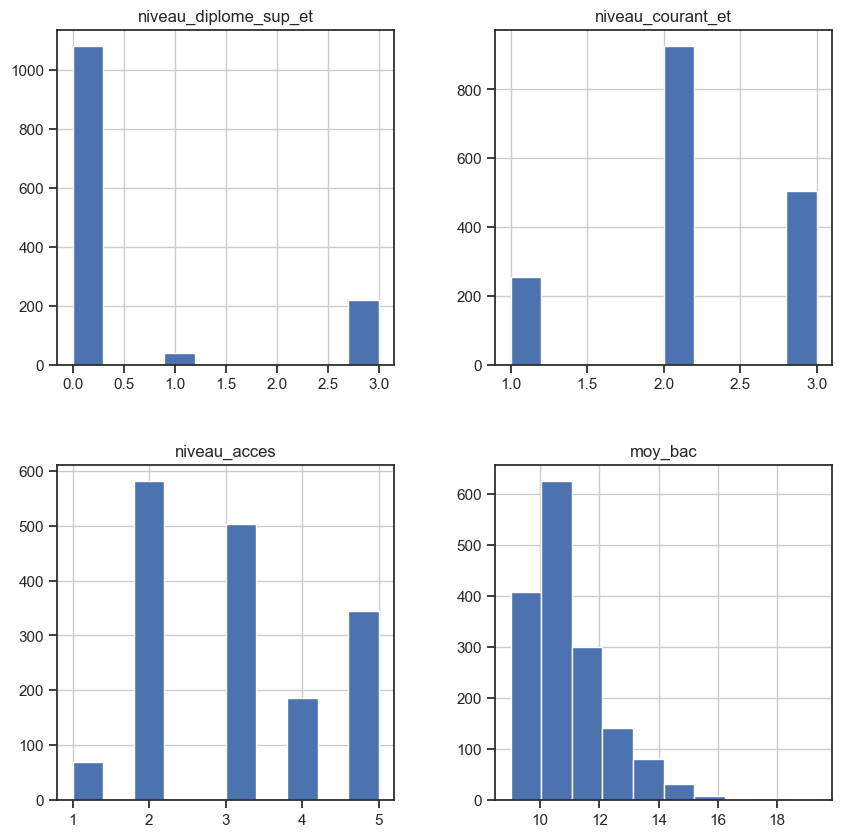

In [253]:
#to understand how to fill the missing values using the mean or the median or the mode , reprsent the distribution of the data
df_copy.hist(figsize=(10,10))

In [254]:
# Variables quantitatives
# Remplacer les valeurs manquantes par la moyenne (loi normale, théoréme centrale limite)
# la variable my_bac: distribution proche de normale et les outliers n’ont pas un impact significatif.

df_copy['moy_bac'] = df_copy[ 'moy_bac'].fillna(df_copy['moy_bac'].mean())


In [255]:
# Variables quantitatives
# Remplacer les NaN selon les conditions

# Calculer la valeur la plus fréquente (mode) de la colonne 'niveau_diplome_sup_et'
most_frequent = df_copy['niveau_diplome_sup_et'].mode()[0]

# Remplacer les NaN dans 'niveau_diplome_sup_et' en fonction de 'lib_specialite_esp_et'
df_copy['niveau_diplome_sup_et'] = df_copy.apply(
    lambda row: 3 if pd.isna(row['niveau_diplome_sup_et']) and str(row['lib_specialite_esp_et']).startswith('Master')
    else most_frequent if pd.isna(row['niveau_diplome_sup_et'])
    else row['niveau_diplome_sup_et'],
    axis=1
)

# Aperçu des résultats
print(df_copy[['niveau_diplome_sup_et', 'lib_specialite_esp_et']].head(10))


    niveau_diplome_sup_et                              lib_specialite_esp_et
0                     3.0        Master Professionnel en Business Analytics 
3                     3.0  Master Professionnel en Management Digital et ...
4                     0.0                     Licence en Sciences de Gestion
7                     0.0  Licence Business Computing- Parcours  Business...
8                     0.0  Licence Business Computing- Parcours  Business...
10                    3.0          Master Professionnel  Business Analytics 
11                    3.0  Master Professionnel en Management  Digital et...
12                    0.0                         Licence Business Computing
13                    0.0                         Licence Business Computing
14                    0.0  Licence en Sciences de Gestion -Parcours Compt...


In [256]:
# Convertir les valeurs de niveau_diplome_sup_et en entiers
df_copy['niveau_diplome_sup_et'] = df_copy['niveau_diplome_sup_et'].astype(int)

In [257]:
#find the frequent gap between column date_bac and date_nais_et
from datetime import datetime

# Convert the date columns to datetime objects
df['date_bac'] = pd.to_datetime(df['date_bac'], format='%d/%m/%Y %H:%M', errors='coerce')
df['date_nais_et'] = pd.to_datetime(df['date_nais_et'], format='%d/%m/%Y %H:%M', errors='coerce')

# Calculate the gap and find the most frequent gap
frequent_gap = (df['date_bac'] - df['date_nais_et']).mean()
frequent_gap
#conert frequent_gap to years
frequent_gap = int(frequent_gap.days / 365)
frequent_gap

19

In [258]:
from datetime import datetime

def convert_date(date_naiss):
    # Convert Timestamp to string if needed
    if isinstance(date_naiss, pd.Timestamp):
        date_naiss = date_naiss.strftime('%d/%m/%Y %H:%M')
    
    date_obj = datetime.strptime(date_naiss, '%d/%m/%Y %H:%M')
    us_format = date_obj.strftime('%d/%m/%Y %H:%M')
    year = int(us_format[6:10]) + frequent_gap
    return '01/06/' + str(year) + ' 00:00'

In [259]:
#fill missing value of df_copy['date_bac'] with the result of the function convert_date
df_copy['date_bac'].fillna(df['date_nais_et'].apply(convert_date),inplace=True)
print(df_copy['date_bac'].iloc[0])

01/06/2015 00:00


C:\Users\Asma\AppData\Local\Temp\ipykernel_29052\4189537486.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [260]:
# Convert missing values in date_entree_esp_et based on the value in lib_nature_bac
def convert_date_entree_esp_et(row):
    if row['lib_specialite_esp_et'].startswith('Licence'):
        start_date = row['date_bac']
    else:
        start_date = str("16/09/") + str(int(row['date_bac'][6:10]) + 3) + row['date_bac'][10:]
    return start_date



In [261]:
# Fill missing values in date_entree_esp_et
df_copy['date_entree_esp_et'].fillna(df_copy.apply(convert_date_entree_esp_et, axis=1), inplace=True)

C:\Users\Asma\AppData\Local\Temp\ipykernel_29052\2939815041.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [262]:
df_copy['lib_nature_bac'].unique()

array([nan, 'Bac Economie-gestion', 'Bac Economie',
       'Bac Sciences expérimentales', 'Bac Math', 'Bac téchnique',
       'Bac Technique', 'Scientifique', 'Bac Math ', 'Autre bac',
       'Bac Informatique', 'Bac Français', 'MATH GENIE CEVIL',
       'Bac Général', 'Economique et social'], dtype=object)

In [263]:
# Variables qualitatives
# Remplacer les valeurs manquantes par le mode

#clean the column 'lib_nature_bac' by replacing 'Bac Economie-gestion' with 'Bac Economie' 
df_copy['lib_nature_bac'] = df_copy['lib_nature_bac'].str.lower().str.strip()
df_copy['lib_nature_bac'] = df_copy['lib_nature_bac'].str.replace(r'\bbac economie-gestion\b|\beconomique et social\b', 'bac economie', regex=True)
df_copy['lib_nature_bac'] = df_copy['lib_nature_bac'].str.replace('bac téchnique', 'bac technique')
df_copy['lib_nature_bac'] = df_copy['lib_nature_bac'].str.replace('bac sciences expérimentales','scientifique')
df_copy['lib_nature_bac'] = df_copy['lib_nature_bac'].str.replace(r'\bbac français\b|\bbac général\b', 'autre bac', regex=True)

# Fill missing values in 'lib_nature_bac' with the mode
mode_value = df_copy['lib_nature_bac'].mode()[0]
df_copy['lib_nature_bac'].fillna(mode_value, inplace=True)

C:\Users\Asma\AppData\Local\Temp\ipykernel_29052\2218037985.py:13: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [264]:
df_copy['lib_nature_bac'].unique()

array(['bac economie', 'scientifique', 'bac math', 'bac technique',
       'autre bac', 'bac informatique', 'math genie cevil'], dtype=object)

In [265]:
# Calculer la valeur la plus fréquente (mode) de la colonne 'nationalite'
mode_nationalite = df_copy['nationalite'].mode()[0]

# Remplacer les NaN par le mode
df_copy['nationalite'] = df_copy['nationalite'].fillna(mode_nationalite)

In [266]:
df_copy.isnull().sum()

date_nais_et             0
date_bac                 0
niveau_diplome_sup_et    0
lib_specialite_esp_et    0
date_entree_esp_et       0
lib_nature_bac           0
classe_courante_et       0
niveau_courant_et        0
nationalite              0
niveau_acces             0
classe_prec_et           0
resultat_annee_prec      0
moy_bac                  0
dtype: int64

In [267]:
# Réinitialiser l'index
df_copy.reset_index(drop=True, inplace=True)

In [268]:
# Determination du pourcentage des lignes supprimées

initial_count = len(df)
final_count = len(df_copy)

deleted_percentage = ((initial_count - final_count) / initial_count) * 100

print(f"Pourcentage des lignes supprimées : {deleted_percentage:.2f}%")


Pourcentage des lignes supprimées : 35.71%


In [269]:
df_copy.shape

(1685, 13)

## 3. Data cleaning

In [270]:
# Convert column date_nais_et into an Age column and take the current year as 2024
now = pd.Timestamp('now').year
df_copy['date_nais_et'] = pd.to_datetime(df_copy['date_nais_et'], format='%d/%m/%Y %H:%M', errors='coerce')
# Create a new column 'age' and drop the column 'date_nais_et'
df_copy['age'] = now - df_copy['date_nais_et'].dt.year
df_copy.drop(['date_nais_et'], axis=1, inplace=True)

In [271]:
#remove the last 2 caracters in the column 'classe_prec_et' and 'classe_courante_et'
df_copy['classe_prec_et'] = df_copy['classe_prec_et'].apply(lambda x: x[:-2])
df_copy['classe_courante_et'] = df_copy['classe_courante_et'].apply(lambda x: x[:-2])

In [272]:
#Harmonisation des valeurs textuelles
#convert resultat_annee_prec into lowercase and remove extra spaces and leading spaces and for startwith(Admise) turn it into admis
for i in range(2):
    df_copy['resultat_annee_prec'] = df_copy['resultat_annee_prec'].apply(lambda x: 'admis' if x.startswith('admise') else x)
    df_copy['resultat_annee_prec'] = df_copy['resultat_annee_prec'].apply(lambda x: 'exclu' if x.startswith('exclue') else x)
    df_copy['resultat_annee_prec'] = df_copy['resultat_annee_prec'].apply(lambda x: ' '.join(x.lower().strip().split()))

In [273]:
#clean the column=[classe_courante_et,classe_courante_et,classe_prec_et] by removing the first character or 2 first characters if 2nd character is a '-'
df_copy['classe_courante_et'] = df_copy['classe_courante_et'].apply(lambda x: x[2:] if x[1] == '-' else x[1:])
df_copy['classe_prec_et'] = df_copy['classe_prec_et'].apply(lambda x: x[2:] if x[1] == '-' else x[1:])

In [274]:
# transform features dates into year format
import datetime
columns_to_transform = ['date_bac','date_entree_esp_et']
for col in columns_to_transform:
    df_copy[col] = df_copy[col].apply(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y %H:%M').year)

## 4. Detection of Outliers

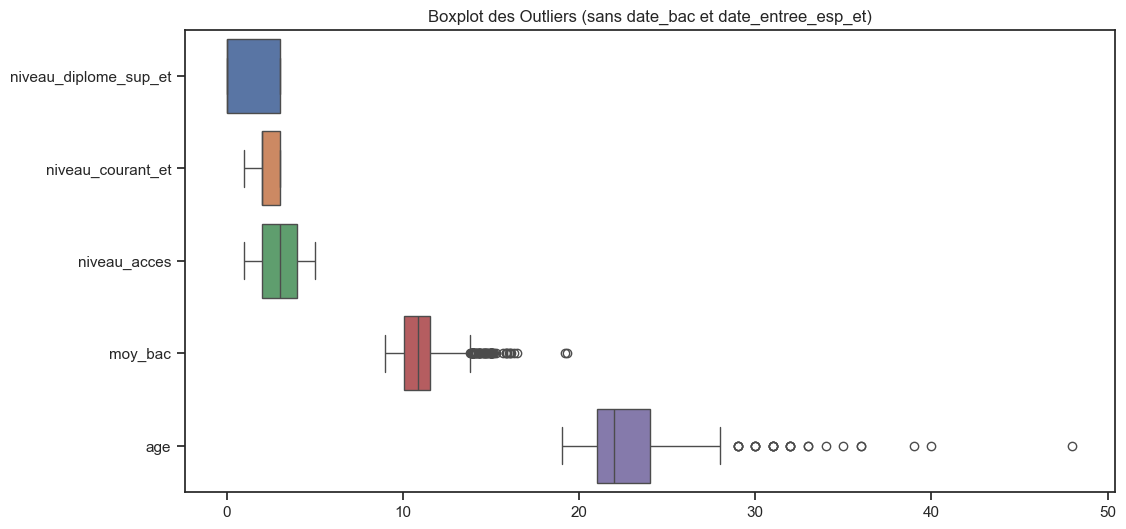

In [275]:
df_clean = df_copy.drop(columns=['date_bac', 'date_entree_esp_et'])

# Créer le boxplot pour les autres colonnes
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=df_clean, orient='h')
ax.set_title('Boxplot des Outliers (sans date_bac et date_entree_esp_et)')
plt.show()

In [276]:
Q1 = df_copy['moy_bac'].quantile(0.25)
Q3 = df_copy['moy_bac'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)
print("IQR:", IQR)
# Detect outliers
outliers_moy_bac = df_copy[(df_copy['moy_bac'] < lower_bound) | (df_copy['moy_bac'] > upper_bound)]

Lower bound: 7.800000000000001
Upper bound: 13.8
IQR: 1.5


In [277]:
Q1 = df_copy['age'].quantile(0.25)
Q3 = df_copy['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound_age = Q1 - 1.5 * IQR
upper_bound_age = Q3 + 1.5 * IQR
print("Lower bound:", lower_bound_age)
print("Upper bound:", upper_bound_age)
print("IQR:", IQR)
# Detect outliers
outliers_age = df_copy[(df_copy['age'] < lower_bound_age) | (df_copy['age'] > upper_bound_age)]

Lower bound: 16.5
Upper bound: 28.5
IQR: 3.0


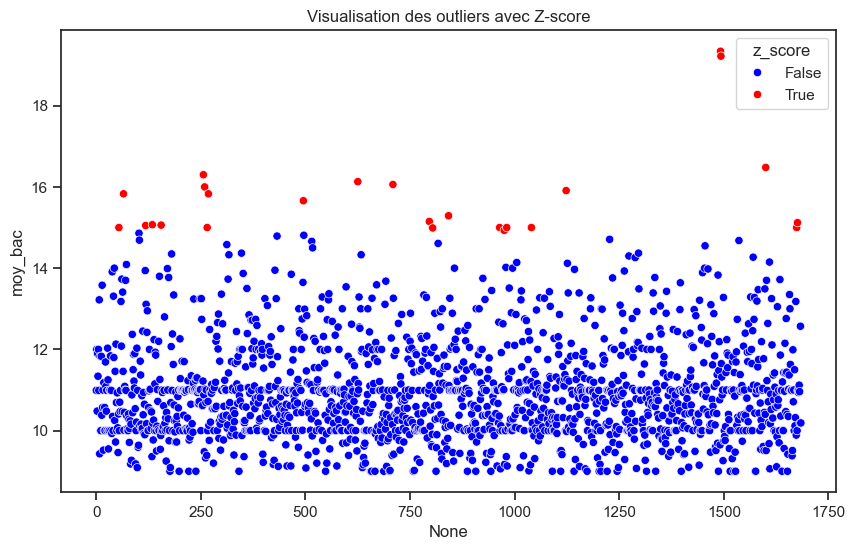

In [278]:
#Visualisation des valeurs aberrante de la variable moy_bac avec Z_score:
from scipy.stats import zscore

df_copy['z_score'] = zscore(df_copy['moy_bac'])
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_copy, x=df_copy.index, y='moy_bac', hue=abs(df_copy['z_score']) > 3, palette={True: 'red', False: 'blue'})
plt.title("Visualisation des outliers avec Z-score")
plt.show()


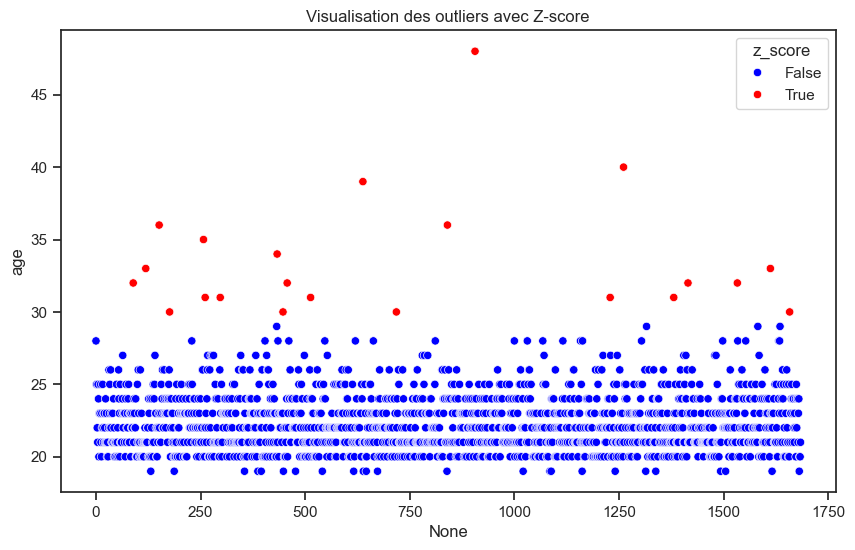

In [279]:
#Visualisation des valeurs aberrante de la variable age avec Z_score:
from scipy.stats import zscore

df_copy['z_score'] = zscore(df_copy['age'])
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_copy, x=df_copy.index, y='age', hue=abs(df_copy['z_score']) > 3, palette={True: 'red', False: 'blue'})
plt.title("Visualisation des outliers avec Z-score")
plt.show()

In [280]:
df_copy.drop(columns=['z_score'], inplace=True)


In [281]:
# Remplacer les valeurs aberrantes 
df_copy['moy_bac'] = df_copy['moy_bac'].apply(
    lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x
)


df_copy['age'] = df_copy['age'].apply(
    lambda x: lower_bound_age if x < lower_bound_age else upper_bound_age if x > upper_bound_age else x
)

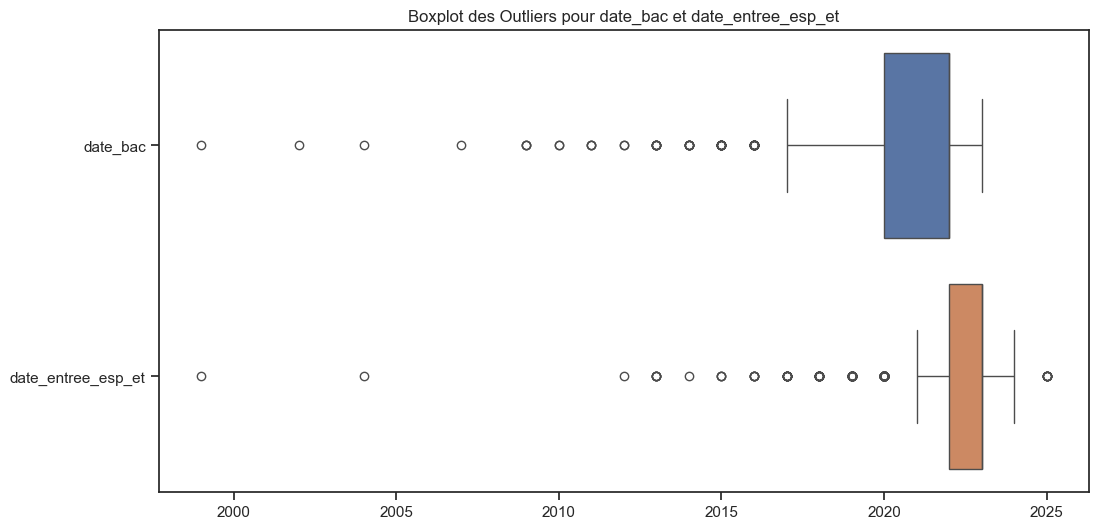

In [282]:
#créer un boxplot séparé pour 'date_bac' et 'date_entree_esp_et'

df_dates = df_copy[['date_bac', 'date_entree_esp_et']]

plt.figure(figsize=(12, 6))
ax_dates = sns.boxplot(data=df_dates, orient='h')
ax_dates.set_title('Boxplot des Outliers pour date_bac et date_entree_esp_et')
plt.show()

In [283]:
# Dictionnaire pour stocker les outliers
outliers = {}

# Parcours des colonnes (date_bac et date_entree_esp_et)
for column in ['date_bac', 'date_entree_esp_et']:
    # Calcul des bornes et de l'IQR pour chaque colonne
    Q1 = df_copy[column].quantile(0.25)
    Q3 = df_copy[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identifier les outliers (valeurs en dehors des bornes)
    outliers[column] = df_copy[(df_copy[column] < lower_bound) | (df_copy[column] > upper_bound)]
    
    # Remplacer les outliers par la borne inférieure ou supérieure
    df_copy.loc[df_copy[column] < lower_bound, column] = lower_bound
    df_copy.loc[df_copy[column] > upper_bound, column] = upper_bound




C:\Users\Asma\AppData\Local\Temp\ipykernel_29052\2665668616.py:17: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2020.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



# Profil statistique des étudiants 
## 1. Statistiques descriptives 

In [284]:
df_copy.head()

,date_bac,niveau_diplome_sup_et,lib_specialite_esp_et,date_entree_esp_et,lib_nature_bac,classe_courante_et,niveau_courant_et,nationalite,niveau_acces,classe_prec_et,resultat_annee_prec,moy_bac,age
0,2017,3,Master Professionnel en Business Analytics,2020.5,bac economie,BA,2,TUNISIENNE,5,BA,admis,10.99075,28.0
1,2018,3,Master Professionnel en Management Digital et ...,2021.0,bac economie,MDSI,1,TUNISIENNE,4,LSG,admis,12.00000,25.0
2,2020,0,Licence en Sciences de Gestion,2023.0,bac economie,LSG,2,TUNISIENNE,2,LSG,admis mention passable,10.48000,25.0
3,2022,0,Licence Business Computing- Parcours Business...,2022.0,bac economie,LBC-BIS,3,TUNISIENNE,3,LBC-BI,admis mention assez bien,11.90000,22.0
4,2022,0,Licence Business Computing- Parcours Business...,2022.0,bac economie,LBC-BIS,3,TUNISIENNE,3,LBC-BI,admis,11.34000,21.0


In [285]:
df_copy.shape

(1685, 13)

In [286]:
# Statistiques descriptives pour les colonnes numériques
print("Statistiques descriptives pour les colonnes numériques: ")
df_copy.describe().T

Statistiques descriptives pour les colonnes numériques: 


,count,mean,std,min,25%,50%,75%,max
date_bac,1685.0,2020.979822,1.785617,2017.0,2020.00,2022.00,2022.00,2023.0
niveau_diplome_sup_et,1685.0,0.928783,1.370163,0.0,0.00,0.00,3.00,3.0
date_entree_esp_et,1685.0,2022.298813,0.954673,2020.5,2022.00,2023.00,2023.00,2024.5
niveau_courant_et,1685.0,2.148368,0.654288,1.0,2.00,2.00,3.00,3.0
niveau_acces,1685.0,3.091988,1.195980,1.0,2.00,3.00,4.00,5.0
moy_bac,1685.0,10.951658,1.167457,9.0,10.05,10.83,11.55,13.8
age,1685.0,22.394659,2.003567,19.0,21.00,22.00,24.00,28.5


In [287]:
# Statistiques descriptives pour les colonnes catégorique
print("Statistiques descriptives pour les colonnes catégoriques: ")
df_copy.describe(include=['object']).T

Statistiques descriptives pour les colonnes catégoriques: 


,count,unique,top,freq
lib_specialite_esp_et,1685,19,Licence Business Computing,334
lib_nature_bac,1685,7,bac economie,958
classe_courante_et,1685,14,LSG,329
nationalite,1685,7,TUNISIENNE,1670
classe_prec_et,1685,15,LSG,463
resultat_annee_prec,1685,16,admis,899


## 2. Visualisation des distributions des variables

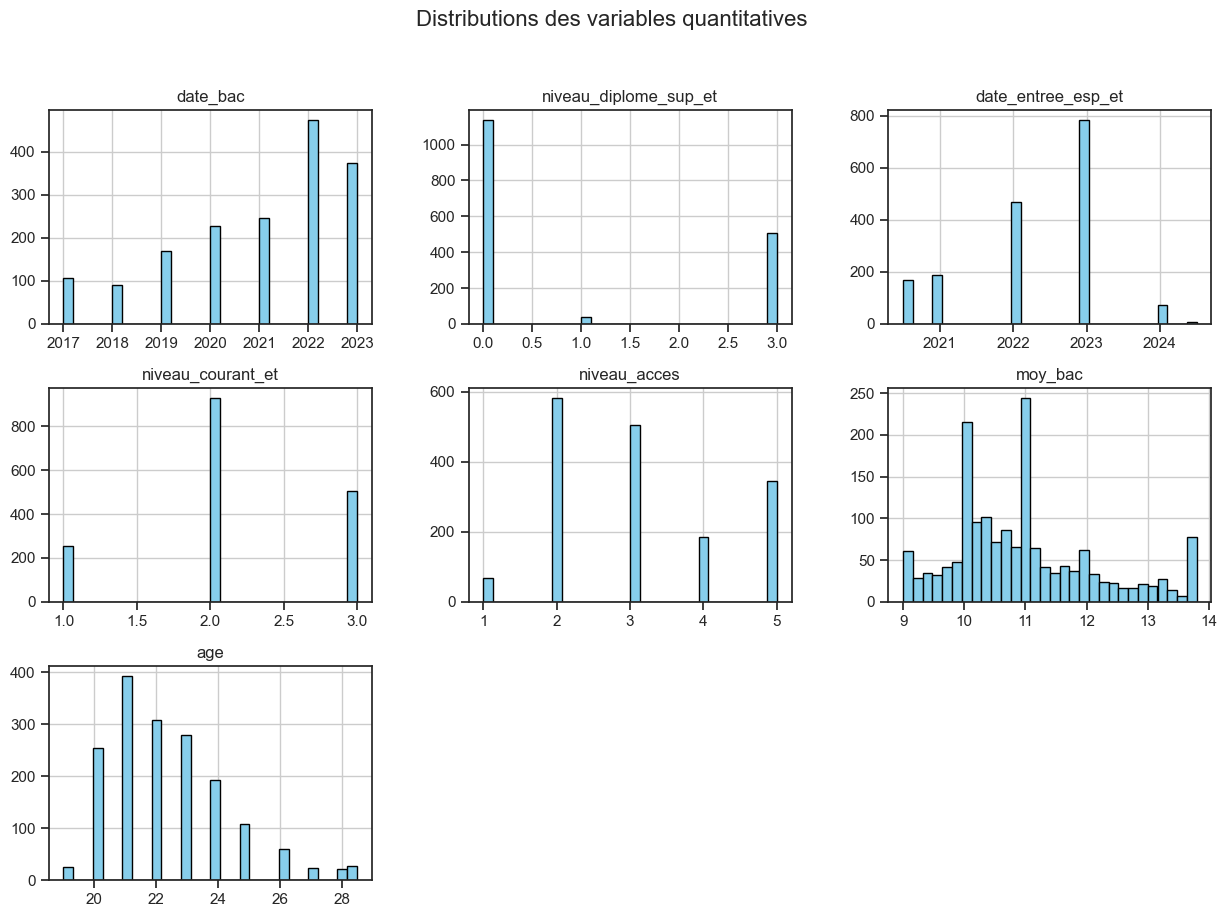

In [288]:
#Variables quantitatives
numerical_vars = df_copy.select_dtypes(include=['float64', 'int64', 'int32']).columns

df_copy[numerical_vars].hist(figsize=(15, 10), bins=30, color='skyblue', edgecolor='black')
plt.suptitle("Distributions des variables quantitatives", fontsize=16)
plt.show()


C:\Users\Asma\AppData\Local\Temp\ipykernel_29052\600975945.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




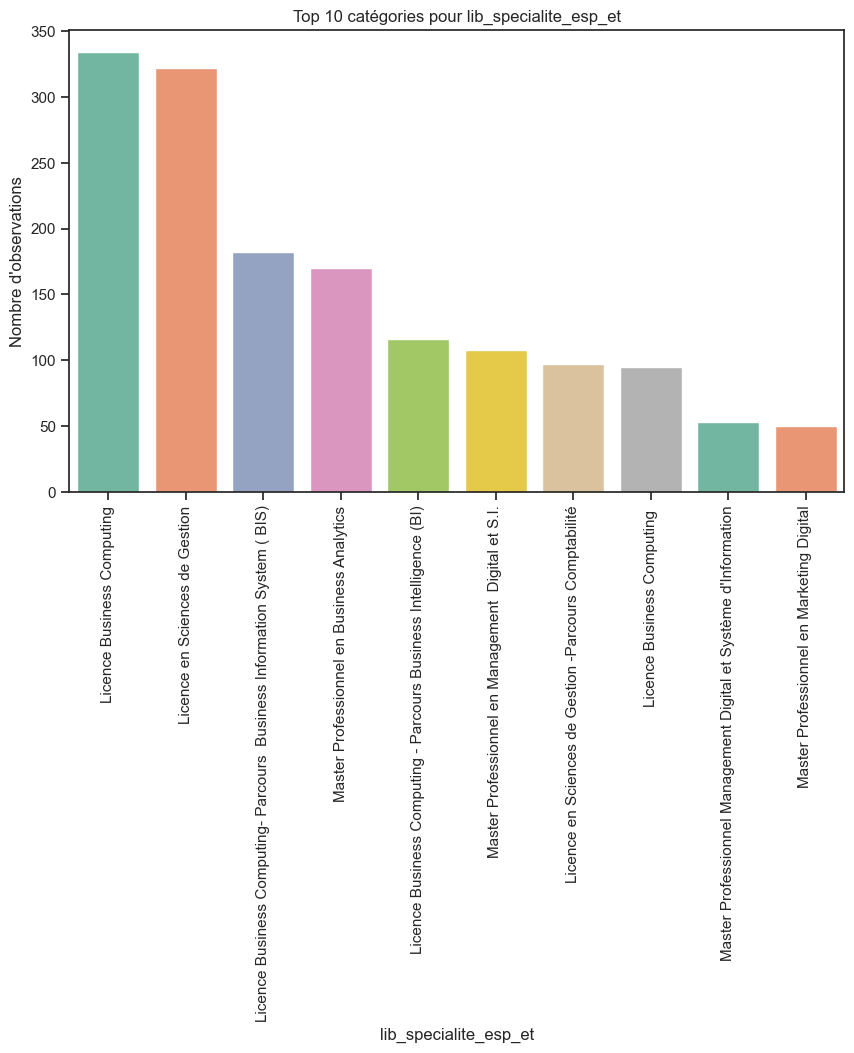

C:\Users\Asma\AppData\Local\Temp\ipykernel_29052\600975945.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




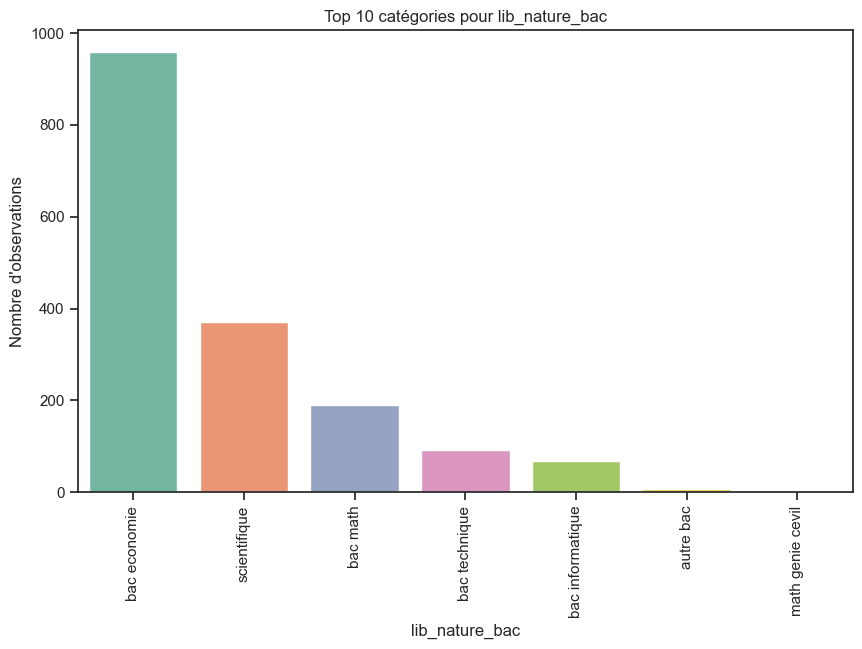

C:\Users\Asma\AppData\Local\Temp\ipykernel_29052\600975945.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




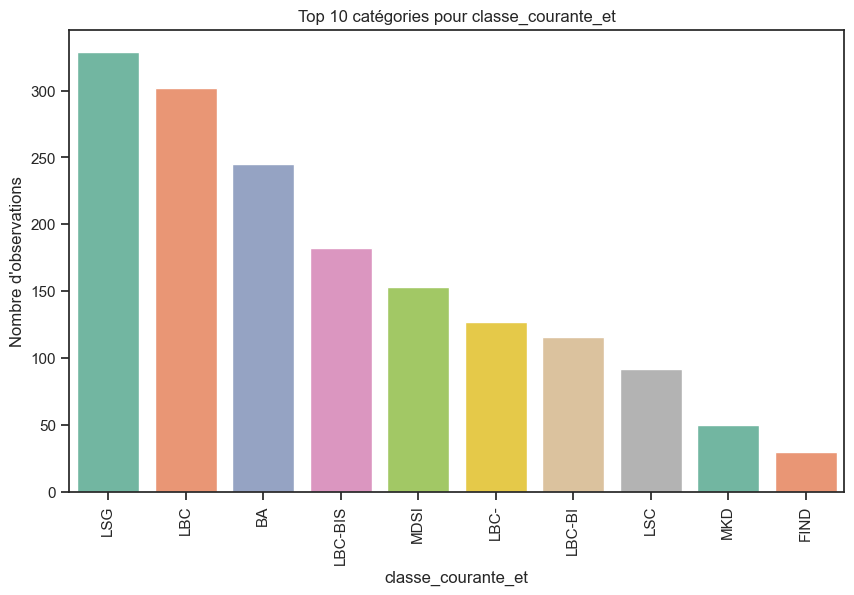

C:\Users\Asma\AppData\Local\Temp\ipykernel_29052\600975945.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




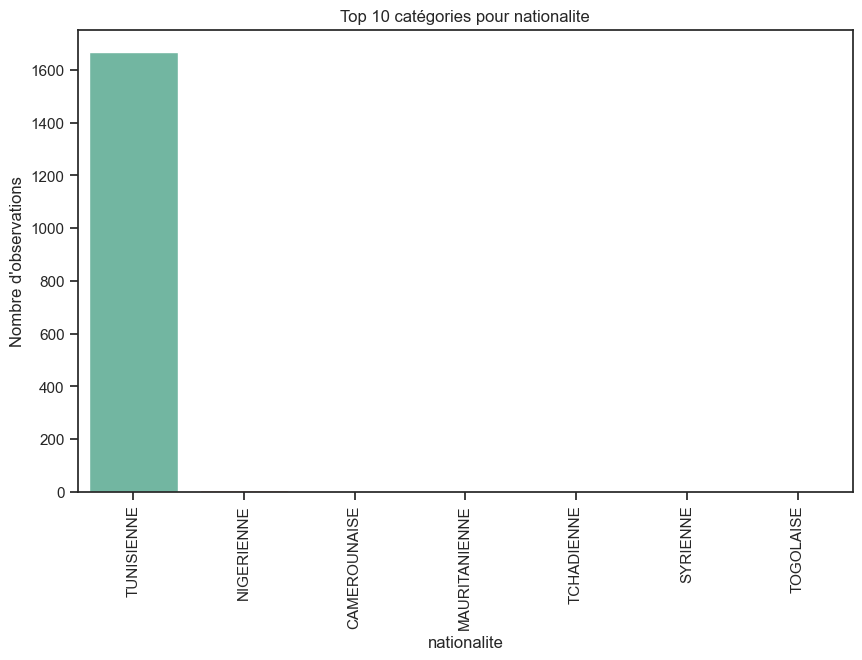

C:\Users\Asma\AppData\Local\Temp\ipykernel_29052\600975945.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




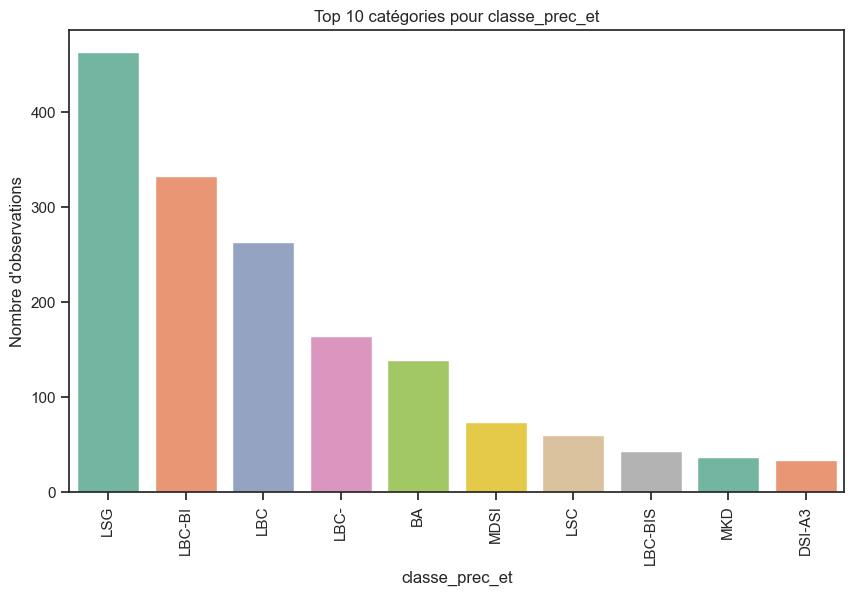

C:\Users\Asma\AppData\Local\Temp\ipykernel_29052\600975945.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




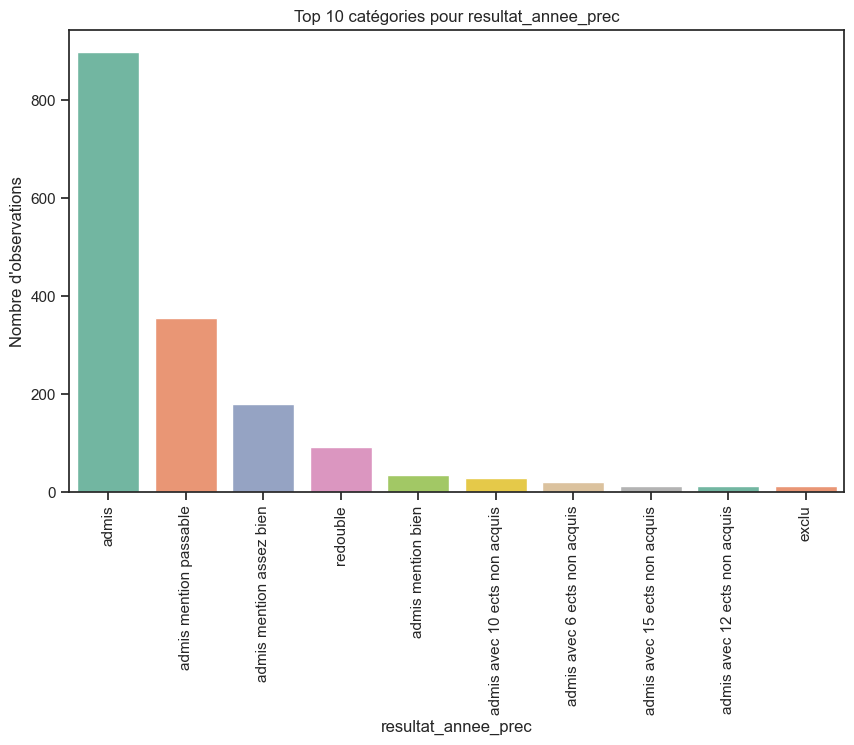

In [289]:
#Variables qualitatives
categorical_vars = df_copy.select_dtypes(include=['object', 'category']).columns

# Limiter le nombre de catégories à afficher
for colonne in categorical_vars:
    plt.figure(figsize=(10, 6))
    # Trier par fréquence et afficher les 10 premières catégories
    top_categories = df_copy[colonne].value_counts().nlargest(10)
    sns.barplot(x=top_categories.index, y=top_categories.values, palette='Set2')
    plt.title(f"Top 10 catégories pour {colonne}")
    plt.xlabel(colonne)
    plt.ylabel("Nombre d'observations")
    plt.xticks(rotation=90)  # Rotation pour lisibilité
    plt.show()



## 3. Corrélations

In [290]:
# Calcul de la matrice de corrélation
correlation_matrix = df_copy[numerical_vars].corr()

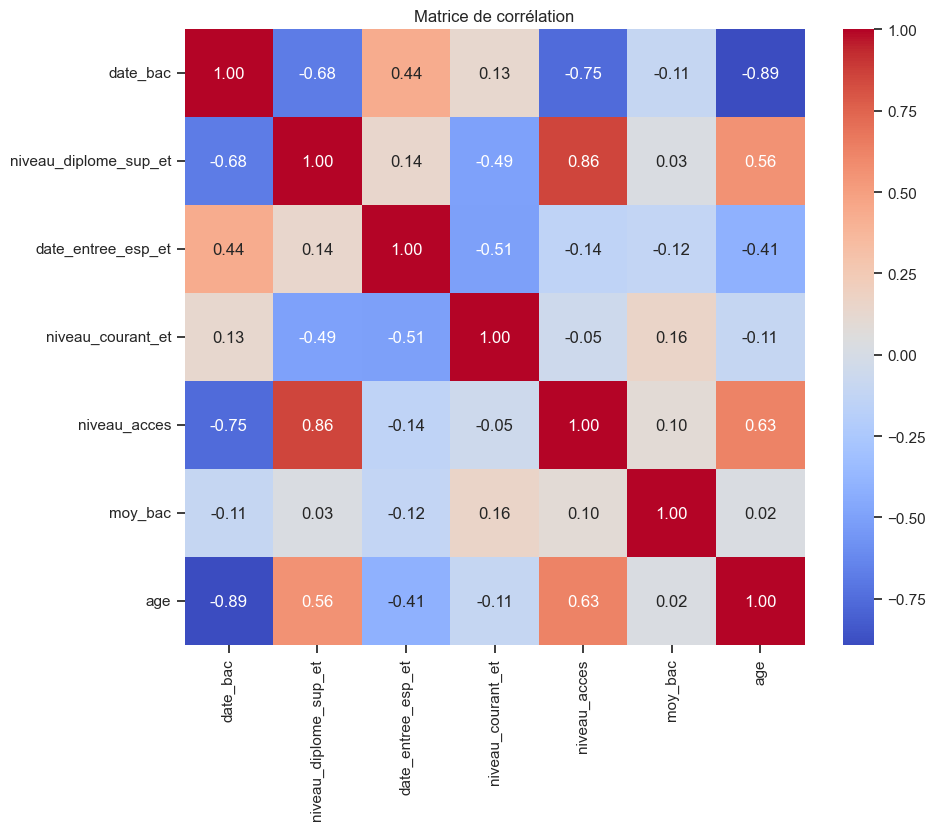

In [291]:
# Affichage de la matrice de corrélation avec une carte thermique
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()


Interpretation : 
- Corrélation forte entre niveau_diplome_sup_et et niveau_acces (0.79) :cela signifie que ces deux variables évoluent ensemble. Par exemple, un niveau plus élevé dans niveau_diplome_sup_et pourrait être associé à un niveau d'accès plus élevé.
- Corrélations faibles avec moy_bac (valeurs proches de 0) :les corrélations entre moy_bac et les autres variables (niveau_diplome_sup_et, niveau_courant_et, et niveau_acces) sont faibles.Cela indique que moy_bac est largement indépendante des autres variables.
- Corrélation faible entre niveau_courant_et et les autres variables :les corrélations avec niveau_diplome_sup_et (0.03) et niveau_acces (0.34) restent faibles, ce qui suggère que cette variable n’a pas de relation forte avec les autres.

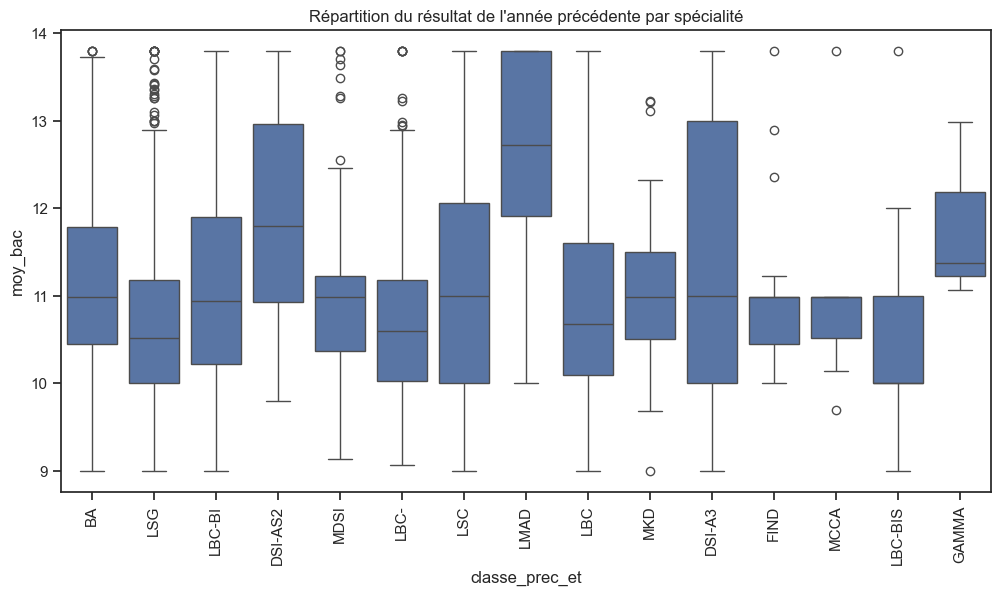

In [292]:
# Box plot pour la variable 'resultat_annee_prec' en fonction de la 'classe_prec_et'
plt.figure(figsize=(12, 6))
sns.boxplot(x='classe_prec_et', y='moy_bac', data=df_copy)
plt.title("Répartition du résultat de l'année précédente par spécialité")
plt.xticks(rotation=90)  # Rotation pour lisibilité
plt.show()


In [293]:
#Correlation entre deux variables qualitatives : 
from scipy.stats import chi2_contingency

# Tableau de contingence
contingency_table = pd.crosstab(df_copy['resultat_annee_prec'], df_copy['classe_prec_et'])

# Test du Chi-2
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-2 = {chi2:.2f}, p-value = {p:.3f}")


Chi-2 = 539.47, p-value = 0.000


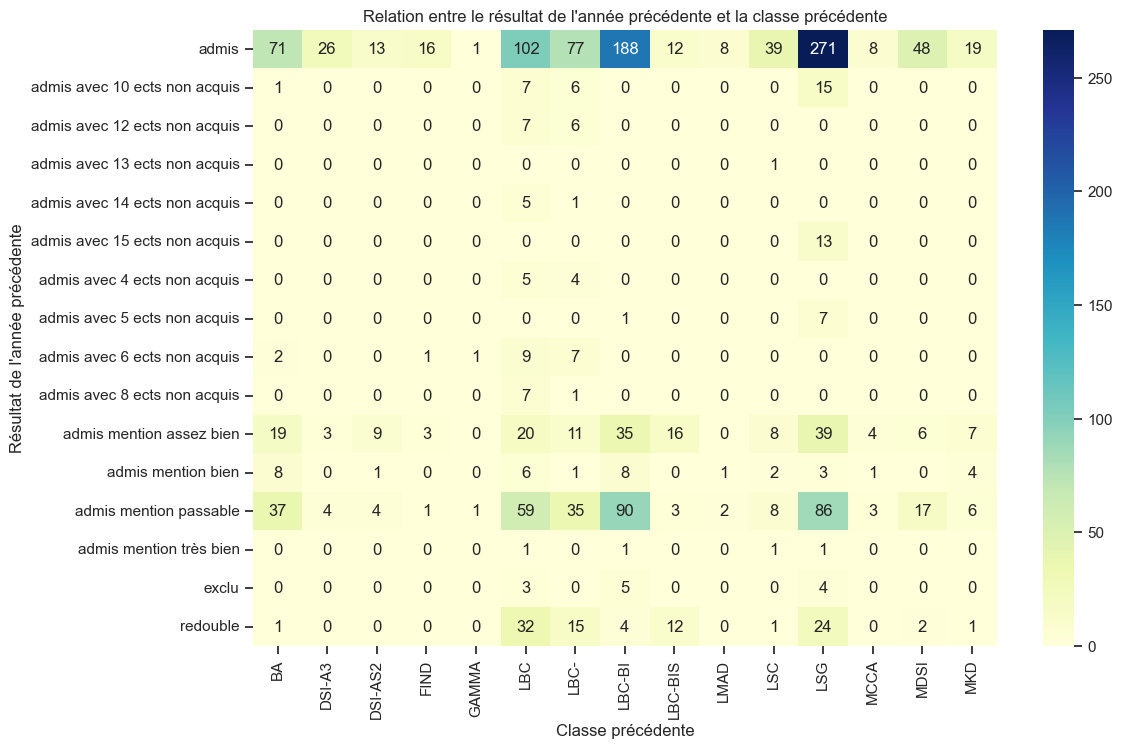

In [294]:
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Relation entre le résultat de l'année précédente et la classe précédente")
plt.xlabel("Classe précédente")
plt.ylabel("Résultat de l'année précédente")
plt.show()


## 4. Encoding of categorical features

### 4.1 Frequency encoding

In [295]:
#Use Frequency encoding for nationalite
# Calculate the frequency of each category in 'nationalite'
nationalite_freq = df_copy['nationalite'].value_counts(normalize=True)
# Map the frequency values back to the 'nationalite' column
df_copy['nationalite_encoded'] = df_copy['nationalite'].map(nationalite_freq)

#### 4.2 Label Encoding

In [296]:
#use Label encoding for the column 'lib_nature_bac'(variable ordinale)
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
df_copy['lib_nature_bac_encoded'] = (labelencoder_y.fit_transform(df_copy['lib_nature_bac'])).astype('int64') 


In [297]:
def custom_grade_encoder(grade):
    # Dictionary mapping grades to numerical values
    grade_mapping = {
        'exclu': 0,                           # Excluded - lowest
        'redouble': 1,                        # Repeat year
        'admis avec 15 ects non acquis': 2,   # Most ECTS credits missing
        'admis avec 14 ects non acquis': 3,
        'admis avec 13 ects non acquis': 4,
        'admis avec 12 ects non acquis': 5,
        'admis avec 10 ects non acquis': 6,
        'admis avec 8 ects non acquis': 7,
        'admis avec 6 ects non acquis': 8,
        'admis avec 5 ects non acquis': 9,
        'admis avec 4 ects non acquis': 10,   # Least ECTS credits missing
        'admis': 11,                          # Basic pass
        'admis mention passable': 12,         # Pass with fair mention
        'admis mention assez bien': 13,       # Pass with fairly good mention
        'admis mention bien': 14,             # Pass with good mention
        'admis mention très bien': 15         # Pass with very good mention - highest
    }
    return grade_mapping.get(grade, -1)  # Returns -1 for any unknown grade

# Apply the encoding to your dataframe
df_copy['resultat_annee_prec'] = df_copy['resultat_annee_prec'].apply(custom_grade_encoder)

In [298]:
df_copy['resultat_annee_prec'].unique()

array([11, 12, 13,  6,  0,  1,  3,  8,  2,  7,  5,  9, 14, 10, 15,  4])

### 4.3 Target Encoding 

In [51]:
'''# Calculate the mean of the target for each category in 'lib_nature_bac'
target_mean = df_copy.groupby('lib_nature_bac')['resultat_annee_prec'].mean()
# Map the calculated means back to the 'lib_nature_bac' column
df_copy['lib_nature_bac_encoded'] = df_copy['lib_nature_bac'].map(target_mean)'''


"# Calculate the mean of the target for each category in 'lib_nature_bac'\ntarget_mean = df_copy.groupby('lib_nature_bac')['resultat_annee_prec'].mean()\n# Map the calculated means back to the 'lib_nature_bac' column\ndf_copy['lib_nature_bac_encoded'] = df_copy['lib_nature_bac'].map(target_mean)"

In [299]:
# Calculate the mean of the target for 'lib_specialite_esp_et'
specialite_mean = df_copy.groupby('lib_specialite_esp_et')['resultat_annee_prec'].mean()

# Map the calculated means back
df_copy['lib_specialite_esp_et_encoded'] = df_copy['lib_specialite_esp_et'].map(specialite_mean)

In [300]:
# Calculate the mean of the target for 'classe_courante_et'
courante_mean = df_copy.groupby('classe_courante_et')['resultat_annee_prec'].mean()
# Map the calculated means back
df_copy['classe_courante_et_encoded'] = df_copy['classe_courante_et'].map(courante_mean)

In [301]:
# Calculate the mean of the target for 'classe_prec_et'
prec_mean = df_copy.groupby('classe_prec_et')['resultat_annee_prec'].mean()
# Map the calculated means back
df_copy['classe_prec_et_encoded'] = df_copy['classe_prec_et'].map(prec_mean)

In [302]:
df_copy['resultat_annee_prec'] = pd.to_numeric(df_copy['resultat_annee_prec'], errors='coerce')

## 5. Standardization

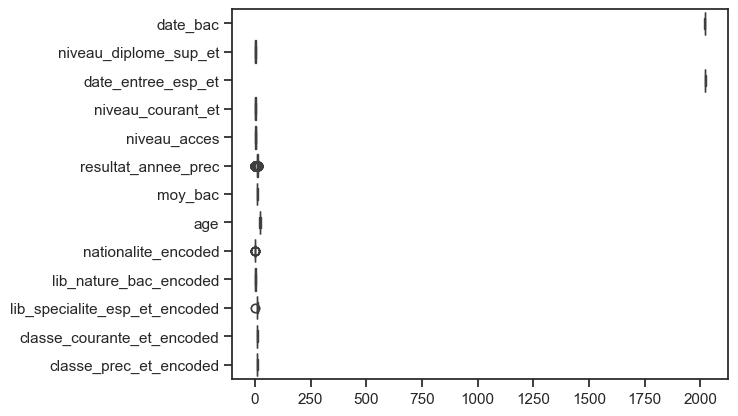

In [303]:
ax = sns.boxplot(data=df_copy, orient='h')

Interpretation :
Etant donné les différences d'échelles observées, il est fortement recommandé d'appliquer une standardisation:
- date_bac et date_entree_esp_et ont une échelle beaucoup plus grande que les autres variables. Cela signifie qu'elle pourrait dominer les autres variables dans certains algorithmes (ex. : clustering) si elles ne sont pas standardisées.
- D'autres variables comme niveau_diplome_sup_et, niveau_courant_et, et niveau_acces ont des plages beaucoup plus petites.

In [304]:
#scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_copy.select_dtypes(include=['int64', 'float64', 'int32']))
df_scaled = pd.DataFrame(df_scaled, columns=df_copy.select_dtypes(include=['int64', 'float64','int32']).columns)
df_scaled.head()

,date_bac,niveau_diplome_sup_et,date_entree_esp_et,niveau_courant_et,niveau_acces,resultat_annee_prec,moy_bac,age,nationalite_encoded,lib_nature_bac_encoded,lib_specialite_esp_et_encoded,classe_courante_et_encoded,classe_prec_et_encoded
0,-2.229483,1.512105,-1.884779,-0.226830,1.595827,0.145476,0.033495,2.798511,0.094774,-0.746732,0.700871,0.902294,1.251688
1,-1.669286,1.512105,-1.360884,-1.755663,0.759445,0.145476,0.898237,1.300737,0.094774,-0.746732,0.683323,0.560742,-0.308408
2,-0.548893,-0.678064,0.734697,-0.226830,-0.913320,0.482652,-0.404125,1.300737,0.094774,-0.746732,-0.837053,-0.926818,-0.308408
3,0.571500,-0.678064,-0.313093,1.302003,-0.076937,0.819827,0.812555,-0.197036,0.094774,-0.746732,0.984182,1.054243,0.889708
4,0.571500,-0.678064,-0.313093,1.302003,-0.076937,0.145476,0.332738,-0.696294,0.094774,-0.746732,0.984182,1.054243,0.889708


## Detect outliers after standardization

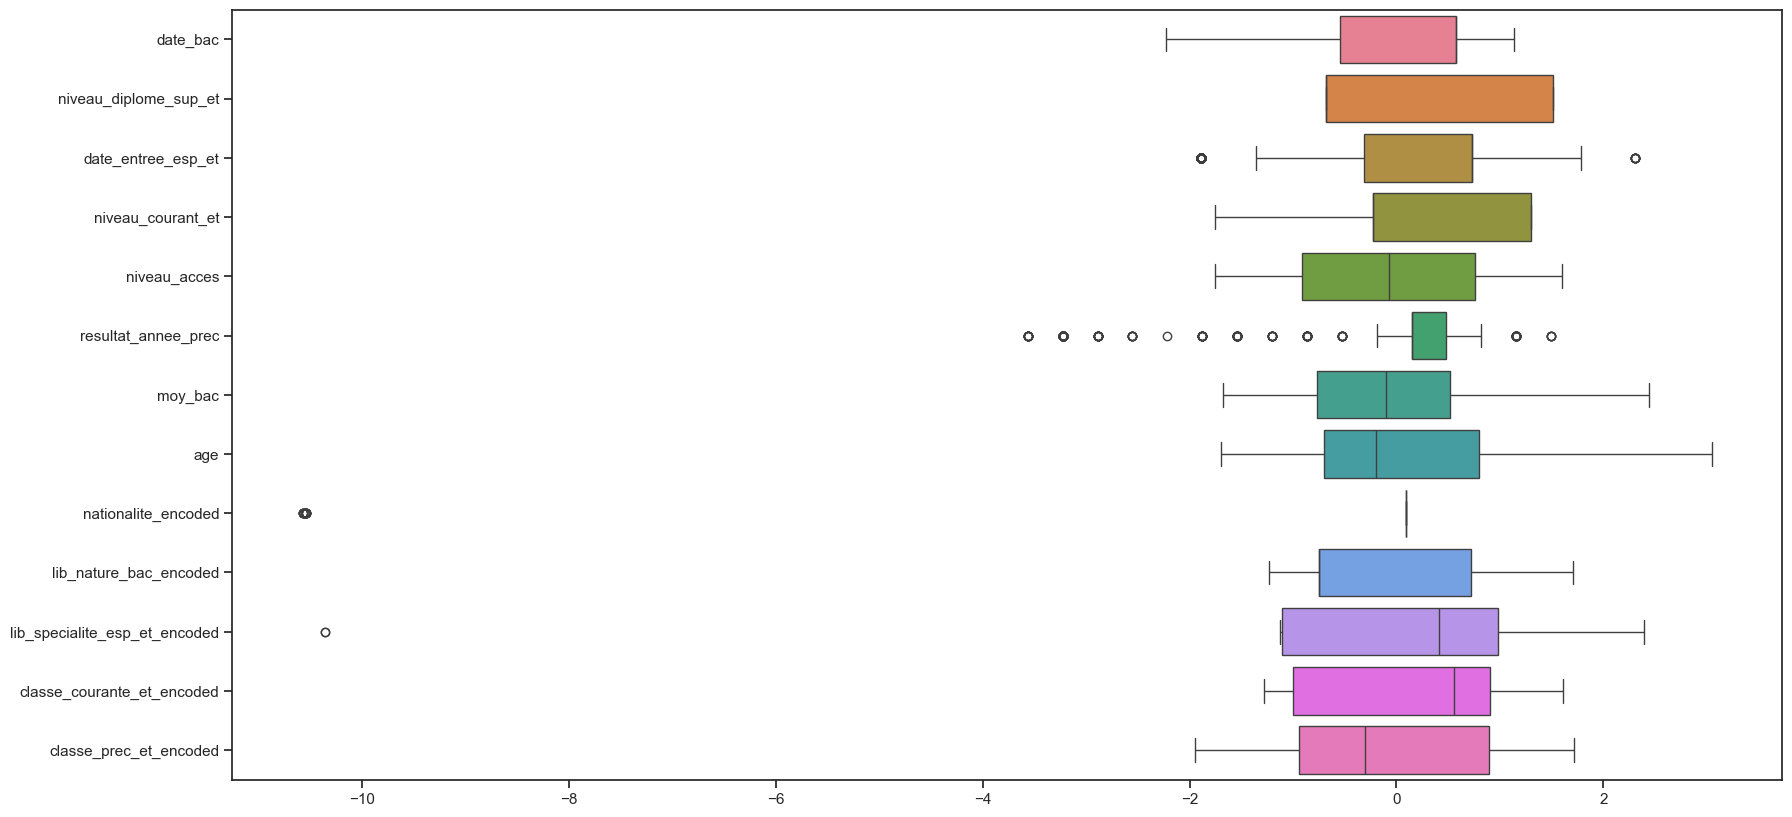

In [305]:
# Create a boxplot to visualize the outliers
plt.figure(figsize=(20,10))
sns.boxplot(data=df_scaled, orient='h')
plt.show()

## Correlation after standardization 

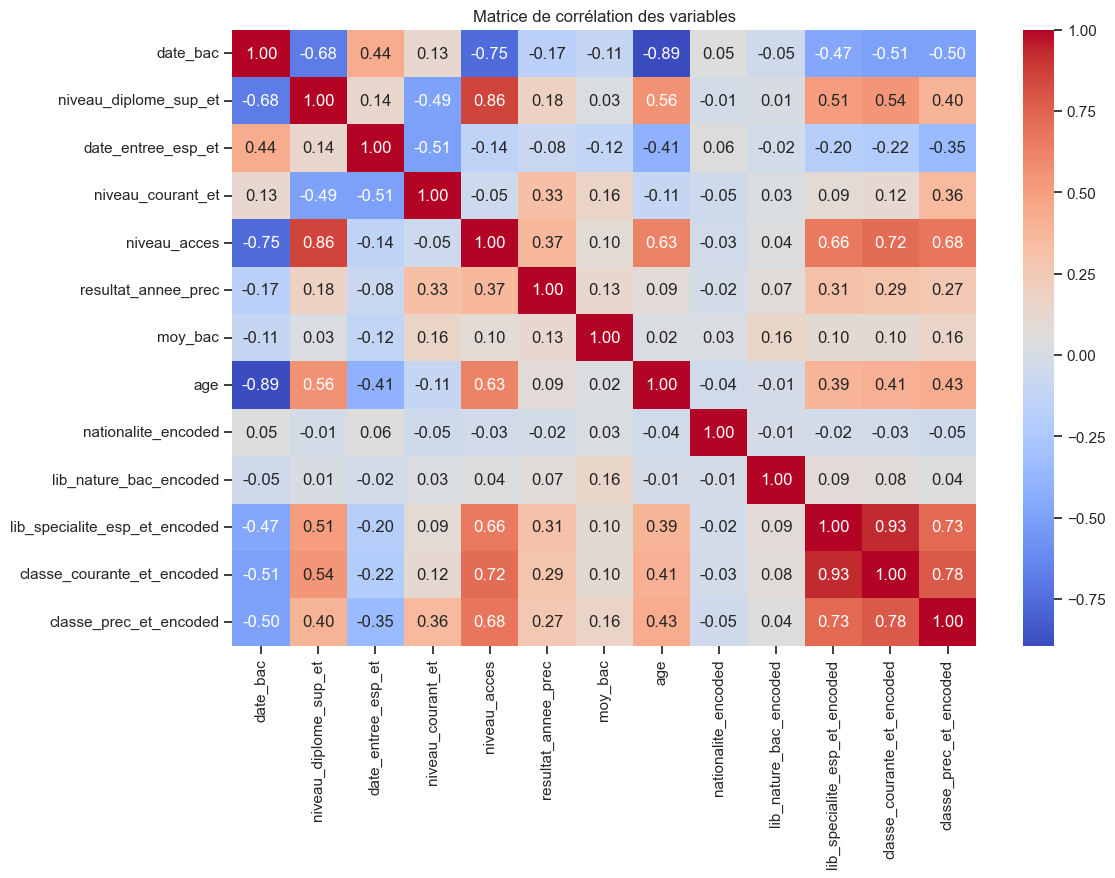

In [306]:
# Calcul de la matrice de corrélation
correlation_matrix = df_scaled.corr()

# Affichage de la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Matrice de corrélation des variables")
plt.show()

### Interprétation : 
1. Variables fortement corrélées (corrélation proche de 1 ou -1) :
classe_courante_et_encoded et classe_prec_et_encoded (0.93) : Ces deux variables ont une corrélation très forte, ce qui indique que la classe courante d’un étudiant est fortement liée à sa classe précédente. Cela est logique puisque les classes se suivent généralement dans une progression.
niveau_acces et lib_specialite_esp_et_encoded (0.66) : Il y a une forte corrélation positive entre le niveau d’accès et la spécialité, ce qui pourrait refléter une tendance selon laquelle certaines spécialités correspondent à des niveaux d’études spécifiques.
niveau_diplome_sup_et et niveau_acces (0.86) : Cette relation indique que le niveau de diplôme supérieur est fortement lié au niveau d’accès.

2. Variables modérément corrélées :
niveau_acces et classe_courante_et_encoded (0.72) : Cette corrélation indique que le niveau d’accès est lié à la classe courante, ce qui est intuitif dans un parcours académique.
date_bac et date_entree_esp_et (0.60) : Une corrélation modérée positive entre ces deux variables montre que la date du bac est liée à la date d’entrée à l’université, ce qui est cohérent.
lib_specialite_esp_et_encoded et classe_prec_et_encoded (0.73) : Cela peut suggérer que la spécialité influence également la progression académique.

3. Variables faiblement ou non corrélées :
Les variables telles que moy_bac, resultat_annee_prec et nationalite_encoded ont de faibles corrélations avec les autres variables, ce qui pourrait indiquer qu’elles jouent un rôle indépendant dans le dataset.

4. Corrélations négatives :
date_bac et niveau_acces (-0.66) : Cela pourrait indiquer que les étudiants ayant obtenu leur bac plus tôt (date plus ancienne) ont tendance à atteindre un niveau d’accès supérieur.

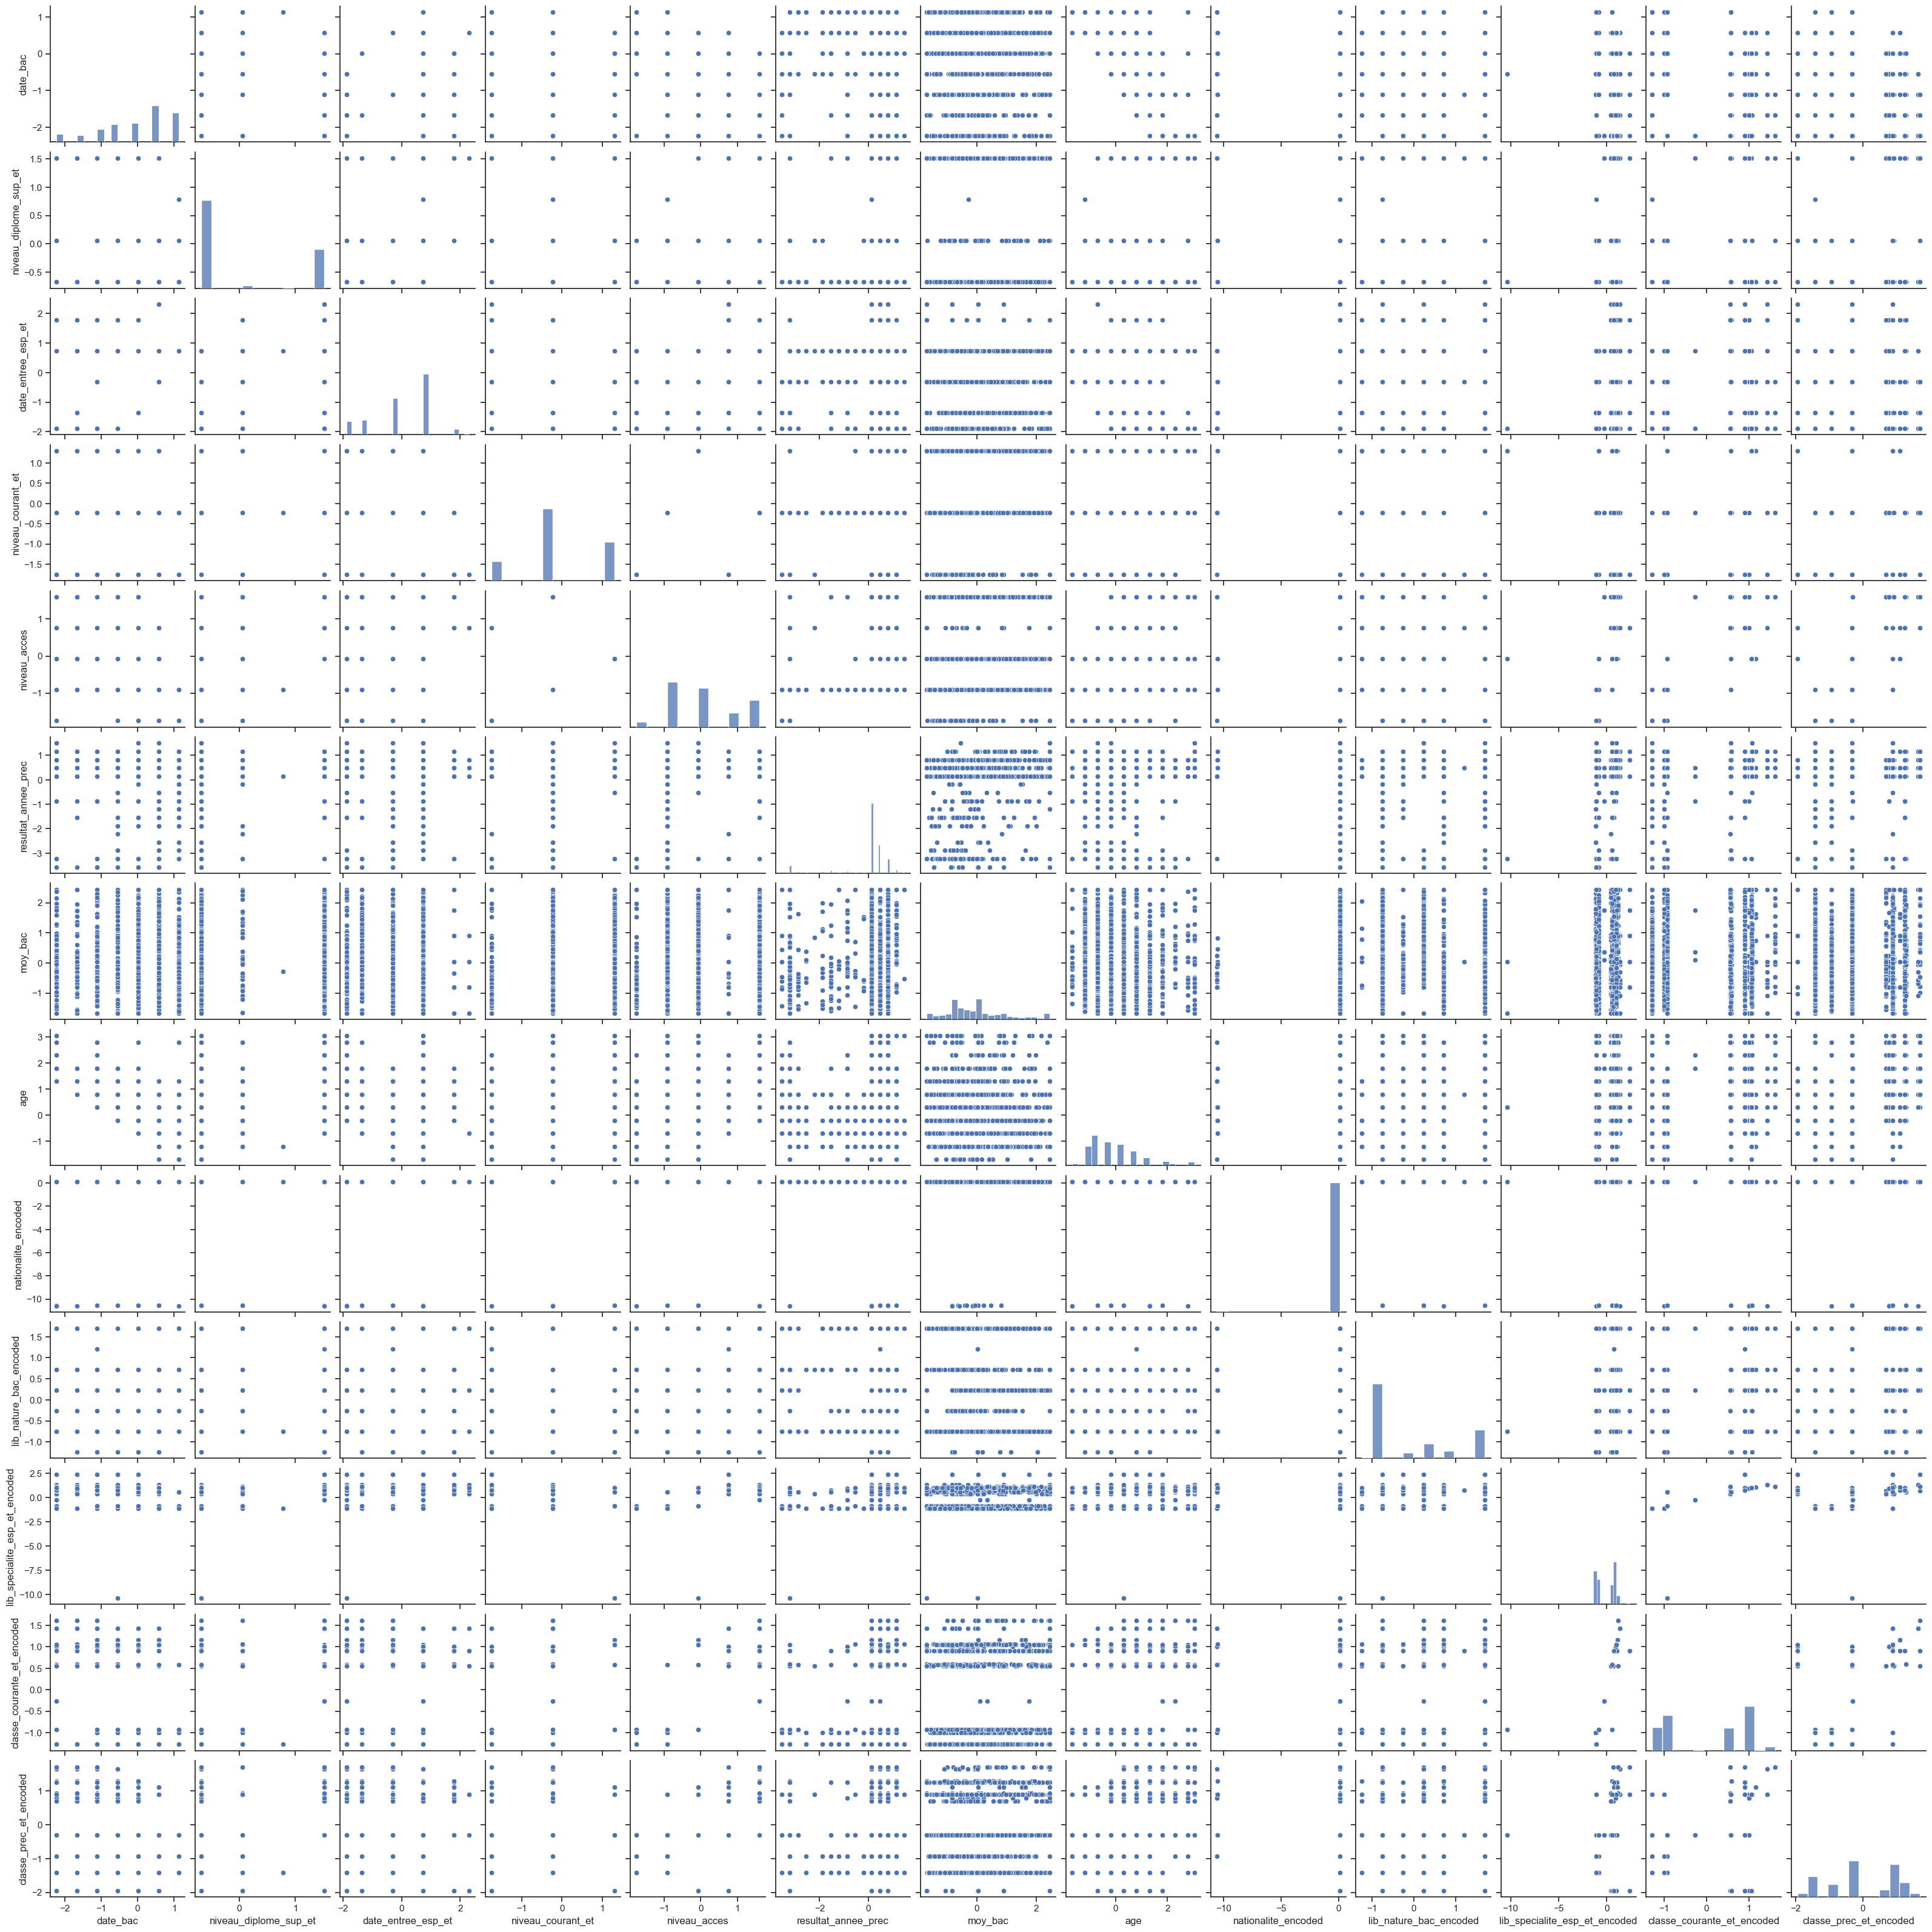

In [307]:
sns.set(style='ticks')
sns.pairplot(df_scaled)

### Interprétation : 

In [308]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


In [309]:
pip install --upgrade nbformat

Note: you may need to restart the kernel to use updated packages.


In [310]:
#Visualize Admissions rate 
import plotly.express as px
grade_mapping = {
        'exclu': 0,                           # Excluded - lowest
        'redouble': 1,                        # Repeat year
        'admis avec 15 ects non acquis': 2,   # Most ECTS credits missing
        'admis avec 14 ects non acquis': 3,
        'admis avec 13 ects non acquis': 4,
        'admis avec 12 ects non acquis': 5,
        'admis avec 10 ects non acquis': 6,
        'admis avec 8 ects non acquis': 7,
        'admis avec 6 ects non acquis': 8,
        'admis avec 5 ects non acquis': 9,
        'admis avec 4 ects non acquis': 10,   # Least ECTS credits missing
        'admis': 11,                          # Basic pass
        'admis mention passable': 12,         # Pass with fair mention
        'admis mention assez bien': 13,       # Pass with fairly good mention
        'admis mention bien': 14,             # Pass with good mention
        'admis mention très bien': 15         # Pass with very good mention - highest
    }
original_to_label = {v: k for k, v in grade_mapping.items()}
# Map grades to their descriptions
df_copy['Grade Description'] = df_copy['resultat_annee_prec'].map(original_to_label)

# Count occurrences of each grade description
grade_counts = df_copy['Grade Description'].value_counts().reset_index()
grade_counts.columns = ['Grade', 'Count']

# Calculate percentages
grade_counts['Percentage'] = (grade_counts['Count'] / grade_counts['Count'].sum()) * 100
print(df_copy['Grade Description'].value_counts())
# Create a pie chart
fig = px.pie(grade_counts, values='Percentage', names='Grade', 
             title='Distribution of Grades Across Students',
             color='Grade', 
             color_discrete_sequence=px.colors.qualitative.Set1)

# Show the figure
fig.show()

Grade Description
admis                            899
admis mention passable           356
admis mention assez bien         180
redouble                          92
admis mention bien                35
admis avec 10 ects non acquis     29
admis avec 6 ects non acquis      20
admis avec 15 ects non acquis     13
admis avec 12 ects non acquis     13
exclu                             12
admis avec 4 ects non acquis       9
admis avec 5 ects non acquis       8
admis avec 8 ects non acquis       8
admis avec 14 ects non acquis      6
admis mention très bien            4
admis avec 13 ects non acquis      1
Name: count, dtype: int64


#### Summary statistics

In [311]:
#create with plotly histogram histfunc=sum  color=smoker
fig = px.histogram(df_copy, x='classe_courante_et', y='resultat_annee_prec', histfunc='sum', color='age')
fig.show()


## 6. Feature Selection

In [323]:
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Create Copies of the DataFrame for Each Technique
df_scaled_var = df_scaled.copy()
df_scaled_kbest = df_scaled.copy()
df_scaled_rfe = df_scaled.copy()
df_scaled_tree = df_scaled.copy()



In [325]:
# Convert continuous target to discrete classes
from sklearn.preprocessing import KBinsDiscretizer
def prepare_target(y, n_bins=3):
    kbd = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='quantile')
    y_binned = kbd.fit_transform(y.values.reshape(-1, 1)).ravel()
    return y_binned

In [326]:
# Step 2: Apply Feature Selection Techniques

# Low Variance
selector = VarianceThreshold(threshold=0.1)
df_scaled_var = selector.fit_transform(df_scaled_var)
df_scaled_var = pd.DataFrame(df_scaled_var, columns=df_scaled.columns[selector.get_support()])


In [327]:
#Test Annova
#chi2 test
#f_classif test
#Rsquare test
# SelectKBest
y_binned = prepare_target(df_scaled_kbest['resultat_annee_prec'], n_bins=3)
X = df_scaled_kbest.drop(columns=['resultat_annee_prec'])
select_k_best = SelectKBest(score_func=f_classif, k=10)
X_kbest = select_k_best.fit_transform(X, y_binned)
selected_features_kbest = X.columns[select_k_best.get_support()]
df_scaled_kbest = pd.DataFrame(X_kbest, columns=selected_features_kbest)

In [328]:
# RFE
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=10)
fit = rfe.fit(X, y_binned)
selected_features_rfe = X.columns[fit.support_]
df_scaled_rfe = pd.DataFrame(fit.transform(X), columns=selected_features_rfe)

In [329]:
# Tree-based
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X, y_binned)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
selected_features_tree = X.columns[indices[:10]]
df_scaled_tree = df_scaled_tree[selected_features_tree]


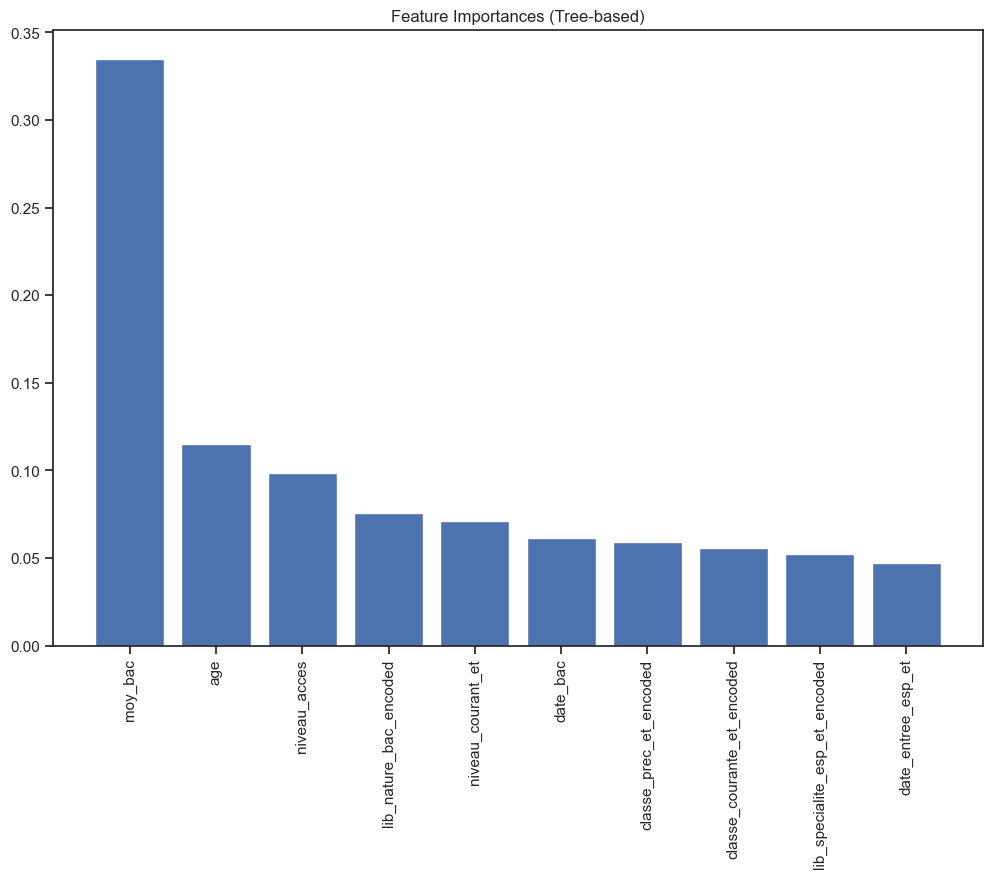

In [330]:
# Step 3: Visualize Selected Features

# Bar plot for feature importances (Tree-based)
plt.figure(figsize=(12, 8))
plt.title('Feature Importances (Tree-based)')
plt.bar(range(len(selected_features_tree)), importances[indices[:10]], align='center')
plt.xticks(range(len(selected_features_tree)), selected_features_tree, rotation=90)
plt.show()



In [331]:
# Step 4: Evaluate Model Performance

# Function to evaluate model performance
def evaluate_model(X, y_binned, selected_features):
    X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y_binned, test_size=0.2, random_state=42)
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Evaluate performance for each technique
accuracy_var = evaluate_model(df_copy, y_binned, df_scaled_var.columns)
accuracy_kbest = evaluate_model(df_copy, y_binned, selected_features_kbest)
accuracy_rfe = evaluate_model(df_copy, y_binned, selected_features_rfe)
accuracy_tree = evaluate_model(df_copy, y_binned, selected_features_tree)

# Print the accuracies
print(f"Accuracy (Low Variance): {accuracy_var:.4f}")
print(f"Accuracy (SelectKBest): {accuracy_kbest:.4f}")
print(f"Accuracy (RFE): {accuracy_rfe:.4f}")
print(f"Accuracy (Tree-based): {accuracy_tree:.4f}")


c:\Users\Asma\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\Users\Asma\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

Accuracy (Low Variance): 0.9852
Accuracy (SelectKBest): 0.5697
Accuracy (RFE): 0.5697
Accuracy (Tree-based): 0.5490


c:\Users\Asma\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\Users\Asma\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

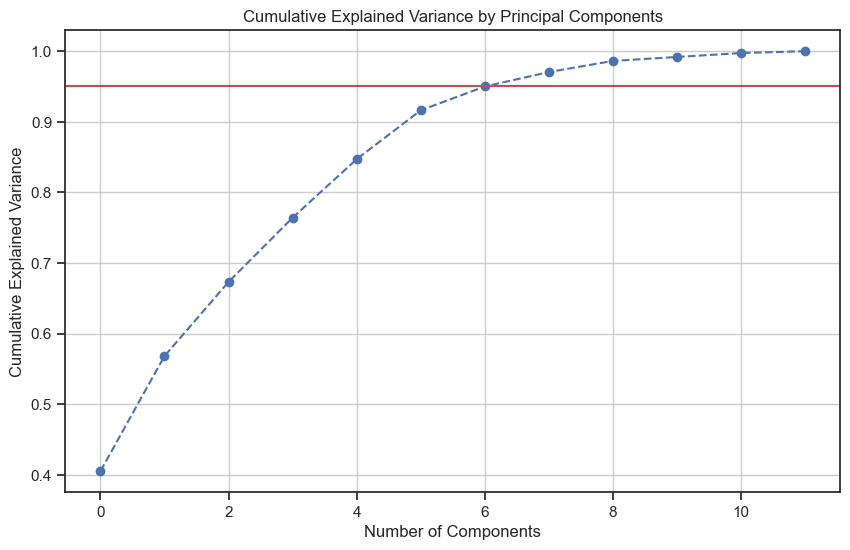

Number of components that capture at least 95% of the variance: 8


In [197]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
df_scaled_pca=df_scaled.copy()
X = df_scaled_pca.drop(columns=['resultat_annee_prec'])
y = df_scaled_pca['resultat_annee_prec']
# Fit PCA to the data
pca = PCA().fit(X)

# Plot cumulative explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.grid(True)
plt.show()

# Identify the number of components that capture at least 95% of the variance
num_components_95 = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
print(f"Number of components that capture at least 95% of the variance: {num_components_95}") 

In [198]:
#Principal Component Analysis and visualize the variance explained by each component
from sklearn.decomposition import PCA  
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X)
# summarize components
print("Explained Variance: %s" % (pca.explained_variance_ratio_,))
print(pca.components_)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

Explained Variance: [0.40515612 0.16301149 0.10500465 0.09094877 0.08284178 0.06920579]
[[-0.38329489  0.34338255 -0.15891878  0.00590531  0.41308123  0.06709063
   0.34212283 -0.02479453  0.03403268  0.36870559  0.38561625  0.36232778]
 [ 0.09055336 -0.4195545  -0.47816678  0.6550977  -0.12716608  0.20677631
  -0.08420377 -0.05768895  0.07943383  0.08948383  0.09516535  0.25545678]
 [-0.38782308 -0.04806214 -0.4685167  -0.02060907 -0.05365922 -0.17984385
   0.47230271 -0.15170475 -0.27142503 -0.35262797 -0.33253936 -0.19350167]
 [-0.17677888  0.0520338  -0.06549954 -0.12459378 -0.01211356  0.6095833
   0.12514427  0.14078658  0.67010816 -0.17674286 -0.18195831 -0.16004878]
 [-0.02920526 -0.02605377 -0.07327836  0.03869992  0.00185434  0.05881916
   0.05798556  0.95327353 -0.2745503  -0.01741386 -0.01202499  0.01480763]
 [ 0.01665988  0.0897193   0.12733866 -0.01675871  0.05228168  0.72724826
  -0.06866142 -0.20889812 -0.62246672 -0.06158435 -0.05686239  0.02664391]]
[4.86476049 1.9572

###### When performing PCA, each principal component explains a certain percentage of the total variance in the data. By examining the explained variance of the first few components, you can determine how many components are necessary to capture a sufficient amount of the total variance

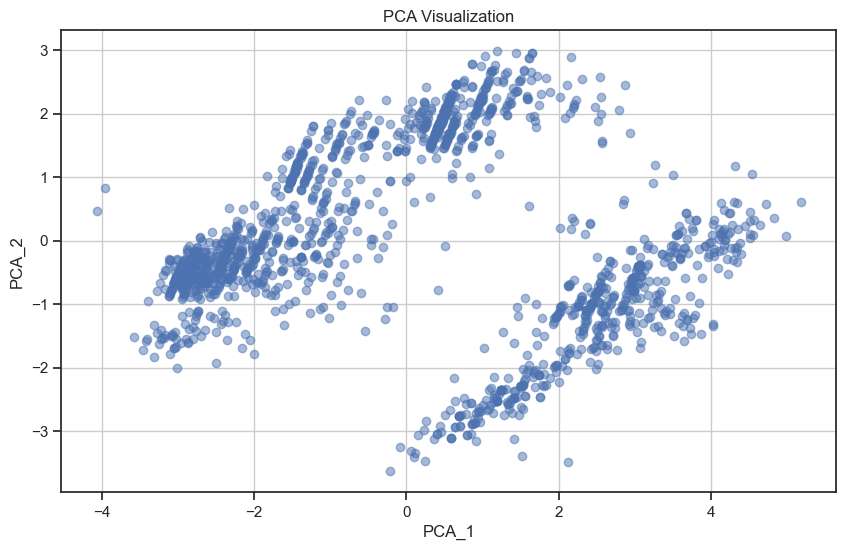

In [228]:
# Visualize results of X_pca with scatter plot
X_pca = pca.transform(X)
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)

# Annotate each point with its label
'''for label, x, y in zip(y, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom', fontsize=8, color='blue')
'''
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.title('PCA Visualization')
plt.grid()
plt.show()

In [221]:
# Option 1: L1-regularized Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel # Import SelectFromModel
feature_sel_model_LG = SelectFromModel(
    LogisticRegression(penalty='l1', solver='liblinear', random_state=0)
)
y_binned = prepare_target(y_train,3)
feature_sel_model_LG.fit(X_train, y_binned)
selected_feat_LG = X_train.columns[(feature_sel_model_LG.get_support())]

print('\nStats for Logistic Regression:')
print('Total features: {}'.format(X_train.shape[1]))
print('Selected features: {}'.format(len(selected_feat_LG)))
print('Features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model_LG.estimator_.coef_[0] == 0)))
print(selected_feat_LG)


Stats for Logistic Regression:
Total features: 12
Selected features: 12
Features with coefficients shrank to zero: 0
Index(['date_bac', 'niveau_diplome_sup_et', 'date_entree_esp_et',
       'niveau_courant_et', 'niveau_acces', 'moy_bac', 'age',
       'nationalite_encoded', 'lib_nature_bac_encoded',
       'lib_specialite_esp_et_encoded', 'classe_courante_et_encoded',
       'classe_prec_et_encoded'],
      dtype='object')


In [222]:
# Option 2: L1-regularized Linear SVC
from sklearn.svm import LinearSVC
feature_sel_model_SVM = SelectFromModel(
    LinearSVC(penalty='l1', dual=False, random_state=0)
)
feature_sel_model_SVM.fit(X_train,  y_binned)
selected_feat_SVM = X_train.columns[(feature_sel_model_SVM.get_support())]

print('\nStats for Linear SVC:')
print('Total features: {}'.format(X_train.shape[1]))
print('Selected features: {}'.format(len(selected_feat_SVM)))
print('Features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model_SVM.estimator_.coef_[0] == 0)))
print(selected_feat_SVM)


Stats for Linear SVC:
Total features: 12
Selected features: 12
Features with coefficients shrank to zero: 0
Index(['date_bac', 'niveau_diplome_sup_et', 'date_entree_esp_et',
       'niveau_courant_et', 'niveau_acces', 'moy_bac', 'age',
       'nationalite_encoded', 'lib_nature_bac_encoded',
       'lib_specialite_esp_et_encoded', 'classe_courante_et_encoded',
       'classe_prec_et_encoded'],
      dtype='object')


#### Evaluate Model Performance with Regularization

In [223]:
# Function to evaluate model performance with regularization
def evaluate_model(X, y, selected_features, penalty='l2', C=1.0):
    # Convert continuous target to classes
    kbd = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
    y_binned = kbd.fit_transform(y.values.reshape(-1, 1)).ravel()

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X[selected_features], y_binned,
        test_size=0.2,
        random_state=42
    )
    model = LogisticRegression(max_iter=1000, penalty=penalty, C=C, solver='liblinear')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Evaluate performance for each technique with L2 regularization
accuracy_var_l2 = evaluate_model(df_copy, y, df_scaled_var.columns, penalty='l2')
accuracy_kbest_l2 = evaluate_model(df_copy, y, selected_features_kbest, penalty='l2')
accuracy_rfe_l2 = evaluate_model(df_copy, y, selected_features_rfe, penalty='l2')
accuracy_tree_l2 = evaluate_model(df_copy, y, selected_features_tree, penalty='l2')

# Evaluate performance for each technique with L1 regularization
accuracy_var_l1 = evaluate_model(df_copy, y, df_scaled_var.columns, penalty='l1')
accuracy_kbest_l1 = evaluate_model(df_copy, y, selected_features_kbest, penalty='l1')
accuracy_rfe_l1 = evaluate_model(df_copy, y, selected_features_rfe, penalty='l1')
accuracy_tree_l1 = evaluate_model(df_copy, y, selected_features_tree, penalty='l1')

c:\Users\Asma\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [225]:
# Function to evaluate model performance with regularization
def evaluate_model(X, y, selected_features, penalty='l2', C=1.0):
    # Convert continuous target to classes
    kbd = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
    y_binned = kbd.fit_transform(y.values.reshape(-1, 1)).ravel()

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X[selected_features], y_binned,
        test_size=0.2,
        random_state=42
    )

    # Train and evaluate
    model = LogisticRegression(
        max_iter=1000,
        penalty=penalty,
        C=C,
        solver='liblinear'
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    return accuracy_score(y_test, y_pred)

# Evaluate with L2
results_l2 = {
    'Variance': evaluate_model(df_copy, y, df_scaled_var.columns, 'l2'),
    'KBest': evaluate_model(df_copy, y, selected_features_kbest, 'l2'),
    'RFE': evaluate_model(df_copy, y, selected_features_rfe, 'l2'),
    'Tree': evaluate_model(df_copy, y, selected_features_tree, 'l2')
}

# Evaluate with L1
results_l1 = {
    'Variance': evaluate_model(df_copy, y, df_scaled_var.columns, 'l1'),
    'KBest': evaluate_model(df_copy, y, selected_features_kbest, 'l1'),
    'RFE': evaluate_model(df_copy, y, selected_features_rfe, 'l1'),
    'Tree': evaluate_model(df_copy, y, selected_features_tree, 'l1')
}

c:\Users\Asma\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [226]:
results_l2

{'Variance': 0.9851632047477745,
 'KBest': 0.5608308605341247,
 'RFE': 0.5727002967359051,
 'Tree': 0.5608308605341247}

In [227]:
results_l1

{'Variance': 0.9940652818991098,
 'KBest': 0.5786350148367952,
 'RFE': 0.5727002967359051,
 'Tree': 0.5608308605341247}

### Splitting the dataset 

In [200]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 7. Clustering

In [201]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [202]:
#visualize the best number of clusters
wcss = []
silhouette_scores = []
max_clusters=10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

    if i > 1:  # Silhouette score needs at least 2 clusters
        silhouette_scores.append(
            silhouette_score(X_train, kmeans.labels_)
        )

# Plot elbow curve
fig = go.Figure()

# WCSS plot
fig.add_trace(go.Scatter(
    x=list(range(1, max_clusters + 1)),
    y=wcss,
    mode='lines+markers',
    name='WCSS',
    line=dict(color='blue')
))

    # Silhouette scores
fig.add_trace(go.Scatter(
    x=list(range(2, max_clusters + 1)),
    y=silhouette_scores,
    mode='lines+markers',
    name='Silhouette Score',
    line=dict(color='red'),
    yaxis='y2'
    ))

fig.update_layout(
    title='Elbow Method & Silhouette Analysis',
    xaxis_title='Number of Clusters',
    yaxis_title='Within Cluster Sum of Squares',
    yaxis2=dict(
        title='Silhouette Score',
        overlaying='y',
        side='right'
        ),
    showlegend=True
    )

fig.show()

In [203]:
def interpret_clustering_results(wcss, silhouette_scores):
    """Interpret clustering evaluation metrics"""
    
    # Calculate elbow point
    wcss_diff = np.diff(wcss)
    elbow_point = np.argmin(wcss_diff) + 1
    
    # Find best silhouette score
    best_k = np.argmax(silhouette_scores) + 2  # +2 because silhouette starts at k=2
    
    print("Clustering Analysis Results:")
    print(f"Suggested number of clusters (elbow method): {elbow_point}")
    print(f"Optimal clusters (silhouette score): {best_k}")
    print(f"Best silhouette score: {max(silhouette_scores):.3f}")
    
    # WCSS interpretation
    print("\nWCSS Interpretation:")
    print("- Lower WCSS indicates more compact clusters")
    print("- Elbow point shows diminishing returns for additional clusters")
    
    # Silhouette interpretation  
    print("\nSilhouette Score Interpretation:")
    print("- Scores near 1 indicate well-defined clusters")
    print("- Scores near 0 indicate overlapping clusters")
    print("- Negative scores indicate potential misclassification")

In [205]:
def perform_clustering(df_scaled, method='kmeans', n_clusters=3, eps=0.5, min_samples=5):
    """
    Perform clustering using the specified method and parameters.
    """
    if method == 'kmeans':
        model = KMeans(n_clusters=n_clusters, random_state=42)
    elif method == 'dbscan':
        model = DBSCAN(eps=eps, min_samples=min_samples)
    elif method == 'hierarchical':
        model = AgglomerativeClustering(n_clusters=n_clusters)
    else:
        raise ValueError("Unsupported clustering method.")
    
    labels = model.fit_predict(df_scaled)
    return labels

def evaluate_clustering(df_scaled, labels, method):
    """
    Evaluate clustering performance using silhouette score and Davies-Bouldin index.
    """
    if len(set(labels)) > 1:  # Check if more than one cluster is formed
        silhouette_avg = silhouette_score(df_scaled, labels)
        davies_bouldin = davies_bouldin_score(df_scaled, labels)
        print(f"{method} - Silhouette Score: {silhouette_avg:.2f}, Davies-Bouldin Index: {davies_bouldin:.2f}")
    else:
        print(f"{method} - Only one cluster formed.")

def visualize_clusters(df_scaled, labels_dict):
    """
    Visualize clusters using PCA for dimensionality reduction.
    """
    pca = PCA(n_components=2)
    df_pca = pca.fit_transform(df_scaled)
    
    plt.figure(figsize=(12, 4))
    for i, (method, labels) in enumerate(labels_dict.items(), 1):
        plt.subplot(1, 3, i)
        sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=labels, palette='viridis')
        plt.title(f'{method} Clustering')
        plt.xlabel('PCA Component 1')
        plt.ylabel('PCA Component 2')
    plt.tight_layout()
    plt.show()



In [206]:
#Loacte the Knee point
from kneed import KneeLocator
k = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
k.elbow

np.int64(3)

#### Train a K-Means Clustering Model

In [208]:
py -m pip install optuna

SyntaxError: invalid syntax (2138534701.py, line 1)

In [209]:
import optuna
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score

def optimize_clustering(df_scaled, method='kmeans', n_trials=100):
    def objective(trial):
        if method == 'kmeans':
            params = {
                'n_clusters': trial.suggest_int('n_clusters', 2, 10),
                'init': trial.suggest_categorical('init', ['k-means++', 'random']),
                'n_init': trial.suggest_int('n_init', 5, 15),
                'max_iter': trial.suggest_int('max_iter', 100, 500)
            }
            model = KMeans(**params)

        elif method == 'dbscan':
            params = {
                'eps': trial.suggest_float('eps', 0.1, 1.0),
                'min_samples': trial.suggest_int('min_samples', 2, 10),
                'metric': trial.suggest_categorical('metric', ['euclidean', 'manhattan'])
            }
            model = DBSCAN(**params)

        elif method == 'hierarchical':
            # Suggest linkage first
            linkage = trial.suggest_categorical('linkage', ['ward', 'complete', 'average', 'single'])

            params = {
                'n_clusters': trial.suggest_int('n_clusters', 2, 10),
                'linkage': linkage
            }

            # Add metric (distance) based on linkage
            if linkage == 'ward':
                params['metric'] = 'euclidean'  # Ward only supports Euclidean
            else:
                params['metric'] = trial.suggest_categorical('metric', ['euclidean', 'manhattan', 'cosine'])

            model = AgglomerativeClustering(**params)

        # Fit and evaluate
        labels = model.fit_predict(df_scaled)

        # Handle case where all points are noise (-1 label in DBSCAN)
        if len(set(labels)) < 2:
            return float('-inf')

        score = silhouette_score(df_scaled, labels)
        return score

    # Create study
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=n_trials)

    return study.best_trial.params, study.best_value


# Usage
best_params_kmeans, best_score_kmeans = optimize_clustering(df_scaled, method='kmeans')
best_params_dbscan, best_score_dbscan = optimize_clustering(df_scaled, method='dbscan')
best_params_hierarchical, best_score_hierarchical = optimize_clustering(df_scaled, method='hierarchical')

print(f"Best KMeans params: {best_params_kmeans}, Score: {best_score_kmeans:.3f}")
print(f"Best DBSCAN params: {best_params_dbscan}, Score: {best_score_dbscan:.3f}")
print(f"Best Hierarchical params: {best_params_hierarchical}, Score: {best_score_hierarchical:.3f}")

c:\Users\Asma\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

[I 2024-12-27 13:37:43,443] A new study created in memory with name: no-name-2b727dcc-0a13-4390-a5d4-4facc112a790
[I 2024-12-27 13:37:43,526] Trial 0 finished with value: 0.2776596085709637 and parameters: {'n_clusters': 9, 'init': 'random', 'n_init': 8, 'max_iter': 260}. Best is trial 0 with value: 0.2776596085709637.
[I 2024-12-27 13:37:43,589] Trial 1 finished with value: 0.3099817619987483 and parameters: {'n_clusters': 4, 'init': 'k-means++', 'n_init': 5, 'max_iter': 474}. Best is trial 1 with value: 0.3099817619987483.
[I 2024-12-27 13:37:43,671] Trial 2 finished with value: 0.2919139973278718 and parameters: {'n_clusters': 8, 'init': 'k-means++', 'n_init': 9, 'max_iter': 400}. Best is trial 1 with value: 0.3099817619987483.
[I 2024-12-27 13:37:43,766] Tr

Best KMeans params: {'n_clusters': 5, 'init': 'k-means++', 'n_init': 12, 'max_iter': 294}, Score: 0.321
Best DBSCAN params: {'eps': 0.9476952938717813, 'min_samples': 2, 'metric': 'euclidean'}, Score: 0.053
Best Hierarchical params: {'linkage': 'complete', 'n_clusters': 2, 'metric': 'manhattan'}, Score: 0.604


In [210]:
# Train Clustering Models
kmeans = perform_clustering(df_scaled, method='kmeans', n_clusters=3)
dbscan = perform_clustering(df_scaled, method='dbscan', eps=0.5, min_samples=5)
hierarchical = perform_clustering(df_scaled, method='hierarchical', n_clusters=3)

#### Evaluate Clustering

In [211]:
# Evaluate Clustering
print("\nClustering Evaluation:")
evaluate_clustering(df_scaled, kmeans, 'K-Means')
evaluate_clustering(df_scaled, dbscan, 'DBSCAN')
evaluate_clustering(df_scaled, hierarchical, 'Hierarchical')


Clustering Evaluation:
K-Means - Silhouette Score: 0.26, Davies-Bouldin Index: 1.42
DBSCAN - Silhouette Score: -0.32, Davies-Bouldin Index: 1.35
Hierarchical - Silhouette Score: 0.33, Davies-Bouldin Index: 1.28


#### Visualize Clusters

In [ ]:
kmeans.cluster_centers_.shape

AttributeError: 'numpy.ndarray' object has no attribute 'cluster_centers_'

In [214]:
y_kmeans = kmeans.labels_

AttributeError: 'numpy.ndarray' object has no attribute 'labels_'

In [215]:
plt.scatter(X_pca[y_kmeans==0,0],X_pca[y_kmeans==0,1],c='red',label='Cluster 0')
plt.scatter(X_pca[y_kmeans==1,0],X_pca[y_kmeans==1,1],c='blue',label='Cluster 1')
plt.scatter(X_pca[y_kmeans==2,0],X_pca[y_kmeans==2,1],c='green',label='Cluster 2')
plt.scatter(X_pca[y_kmeans==3,0],X_pca[y_kmeans==3,1],c='yellow',label='Cluster 3')
for label,x,y in zip(labels,X_pca[:,0],X_pca[:,1]):
    plt.annotate(label,xy=(x,y))
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Clustering')
plt.legend()
plt.show()

NameError: name 'y_kmeans' is not defined

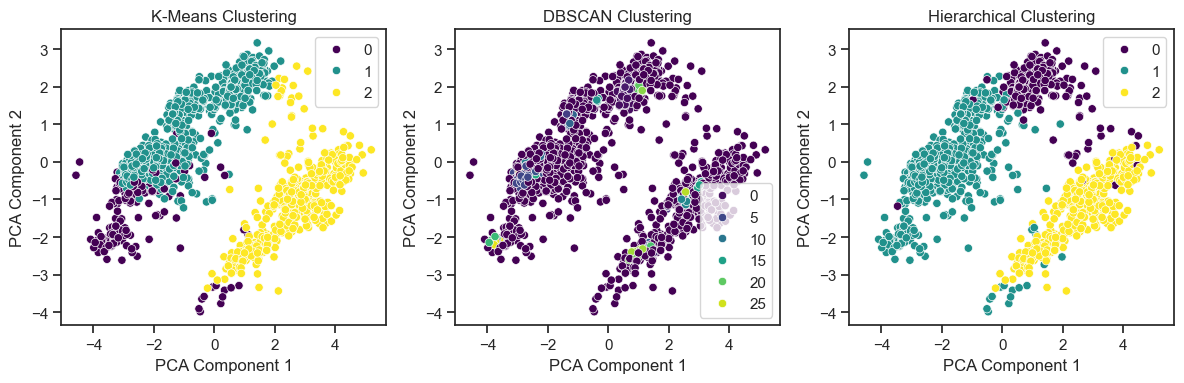

In [213]:
# Visualize Clusters
labels_dict = {
        'K-Means': kmeans,
        'DBSCAN': dbscan,
        'Hierarchical': hierarchical
    }
visualize_clusters(df_scaled, labels_dict)

#### Profiling

In [216]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = df_scaled.columns)
cluster_centers

AttributeError: 'numpy.ndarray' object has no attribute 'cluster_centers_'

In [217]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = df_scaled.columns)
cluster_centers

NameError: name 'cluster_centers' is not defined

#### Discover to which cluster each student belongs

In [ ]:
dataset_cluster = pd.concat([df, pd.DataFrame({'Cluster': y_kmeans})], axis=1)
dataset_cluster.head()

## KNN

In [230]:
y_train_binned = prepare_target(y_train, n_bins=3)
y_test_binned = prepare_target(y_test, n_bins=3)

c:\Users\Asma\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_discretization.py:307: UserWarning:

Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.



In [234]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
#visualize the best number of neighbors
k_range = range(1, 11)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

#### Train a KNN Classifier

In [232]:
# Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train_binned)


KNeighborsClassifier(n_neighbors=3)

#### KNN Model Evaluation

In [233]:
# Predict and evaluate
y_pred = knn.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_binned, y_pred)
precision = precision_score(y_test_binned, y_pred, average='weighted')
recall = recall_score(y_test_binned, y_pred, average='weighted')
f1 = f1_score(y_test_binned, y_pred, average='weighted')

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test_binned, y_pred))

# Perform cross-validation
cv_scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

Accuracy: 0.59
Precision: 0.86
Recall: 0.59
F1 Score: 0.69

Classification Report:
              precision    recall  f1-score   support

         0.0       0.47      0.54      0.50        41
         1.0       0.92      0.59      0.72       296
         2.0       0.00      0.00      0.00         0

    accuracy                           0.59       337
   macro avg       0.46      0.38      0.41       337
weighted avg       0.86      0.59      0.69       337



c:\Users\Asma\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

c:\Users\Asma\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

c:\Users\Asma\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

c:\Users\Asma\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Asma\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Asma\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\Asma\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py", line 238, in fit
    return self._fit(X, y)
           ~~~~~~~~~^^^^^^
  File "c:\Users\Asma\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_base.py", line 499, in _fit
    check_classification_targets(y)
    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~^^^
  File "c:\Users\Asma\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\multiclass.py", line 219, in check_classification_targets
    raise ValueError(
    ...<3 lines>...
    )
ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.


#### Hyperparameter Tuning


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'n_neighbors': [3, 5, 7, 9]}

# Initialize Grid Search
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.2f}")

### Random Forest Classifier

### XGBoost Classifier

Train Model

In [236]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import plotly.express as px
import plotly.graph_objects as go

In [238]:
def train_xgboost_model(X_train, y_train, params=None):
    """Train XGBoost model with given parameters."""
    if params is None:
        params = {
            'max_depth': 6, # Common range: 3-10
            'learning_rate': 0.1, # Smaller = more robust but slower
            'n_estimators': 100, # 100 trees is good starting point, Can increase if underfitting
            'objective': 'multi:softmax', # Multiclass classification
            'num_class': 3 # Matches our target variable
        }
    model = xgb.XGBClassifier(**params)
    model.fit(
        X_train,
        y_train,
        eval_set=[(X_train, y_train)],
        verbose=True
    )

    return model
model = train_xgboost_model(X_train, y_train)
#used API provided by xgboost
eval_results = model.evals_result()

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14], got [-3.56345733 -3.22628159 -2.88910585 -2.55193011 -1.87757862 -1.54040288
 -1.20322714 -0.8660514  -0.52887566 -0.19169992  0.14547582  0.48265157
  0.81982731  1.15700305  1.49417879]

Evaluate Model

In [ ]:
def evaluate_model(model, X_test, y_test):
    """Evaluate model performance."""
    predictions = model.predict(X_test)

    results = {
        'accuracy': accuracy_score(y_test, predictions),
        'classification_report': classification_report(y_test, predictions),
        'confusion_matrix': confusion_matrix(y_test, predictions),
        'cv_scores': cross_val_score(model, X_test, y_test, cv=5)
    }

    return results

# Evaluate
results = evaluate_model(model, X_test, y_test)
print(f"Accuracy: {results['accuracy']:.4f}")
print(f"CV Mean: {results['cv_scores'].mean():.4f} (+/- {results['cv_scores'].std()*2:.4f})")
print("\nClassification Report:")
print(results['classification_report'])

Visualization

In [ ]:
def plot_feature_importance(model, feature_names):
    """Plot feature importance."""
    importance = model.feature_importances_
    fig = px.bar(
        x=feature_names,
        y=importance,
        title='Feature Importance in Student Performance Prediction'
    )
    fig.show()

def plot_learning_curves(results):
    """Plot learning curves to interpret the performance of XGBoost model"""
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        y=results['validation_0']['merror'],
        name='Train Error'
    ))

    fig.add_trace(go.Scatter(
        y=results['validation_0']['mlogloss'],
        name='Train Log Loss'
    ))

    fig.update_layout(
        title='XGBoost Learning Curves',
        xaxis_title='Iterations',
        yaxis_title='Error'
    )
    fig.show()

# Visualize
plot_feature_importance(model, X_train.columns)
plot_learning_curves(model.evals_result())

Interpret Feature Importance

In [ ]:
def interpret_xgboost_results(model, evaluation_results):
    """Interpret XGBoost model results with insights and visualizations."""

    # Get feature importance
    feature_importance = pd.DataFrame({
        'feature': X_train.columns,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)

    # Get learning curves
    learning_curves = model.evals_result()
    train_error = learning_curves['validation_0']['merror']
    val_loss = learning_curves['validation_0']['mlogloss']

    # Analyze convergence and overfitting
    convergence = 'Good' if train_error[-1] < 0.1 else 'Poor'
    overfitting_status = 'Potential overfitting' if results['cv_scores'].std() > 0.1 else 'No significant overfitting'

    # Create interpretations
    interpretations = {
        'feature_importance': {
            'most_important': feature_importance.head(3)['feature'].tolist(),
            'least_important': feature_importance.tail(3)['feature'].tolist(),
        },
        'performance_metrics': results,
        'learning_curves': {
            'convergence': convergence,
            'overfitting_status': overfitting_status
        }
    }

    # Print insights
    print("\n=== XGBoost Model Interpretation ===")
    print("\n1. Feature Importance:")
    print(f"   Top features: {', '.join(interpretations['feature_importance']['most_important'])}")
    print(f"   Least important features: {', '.join(interpretations['feature_importance']['least_important'])}")

    print("\n2. Model Performance:")
    print(f"   Accuracy: {results['accuracy']:.2f}")
    print(f"   Overfitting Status: {overfitting_status}")

    print("\n3. Recommendations:")
    if 'technical_skills' in interpretations['feature_importance']['most_important']:
        print("   - Strengthen technical skills curriculum.")
    if 'soft_skills' in interpretations['feature_importance']['most_important']:
        print("   - Enhance soft skills development.")

    return interpretations

### SVM Classifier 

### TODO 
predict : for student in licence 
predict : for student coming from outer program (licence or masters )